Importação das bibliotecas necessárias

In [3]:
pip install numpy==1.19.5

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB 435.7 kB/s eta 0:00:31
   ---------------------------------------- 0.1/13.3 MB 1.2 MB/s eta 0:00:11
   - -------------------------------------- 0.4/13.3 MB 2.1 MB/s eta 0:00:07
   --- ------------------------------------ 1.0/13.3 MB 5.1 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/13.3 MB 5.1 MB/s eta 0:00:03
   ---- ----------------------------------- 1.5/13.3 MB 4.4 MB/s eta 0:00:03
   ------ --------------------------------- 2.1/13.3 MB 5.5 MB/s eta 0:00:03
   ------ --------------------------------- 2.1/13.3 MB 5.5 MB/s eta 0:00:03
   ------- -------------------------------- 2.6/13.3 MB 5.0 MB/s eta 0:00:03
   --------- ------------------------------ 3.1/13.3 MB 5.7 MB/s eta 0:00:02
   --------- ------------------------------ 3.1/13.3 MB 5.7 MB/s eta 0:00:02
   --------

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.1.0 requires multimethod>=1.4, which is not installed.
pandas-profiling 3.1.0 requires tangled-up-in-unicode==0.1.0, which is not installed.
pandas-profiling 3.1.0 requires visions[type_image_path]==0.7.4, which is not installed.
pandas-profiling 3.1.0 requires joblib~=1.0.1, but you have joblib 1.2.0 which is incompatible.
pandas-profiling 3.1.0 requires markupsafe~=2.0.1, but you have markupsafe 2.1.1 which is incompatible.
tensorboard 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow 2.3.0 requires gast==0.3.3, but you have gast 0.4.0 which is incompatible.
tensorflow 2.3.0 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.19.5 which is incompatible.
tensorflow 2.3.0 requires scipy==1.4.1, but you have

# Sanity Check

Objetivos: 
- Entendimento inicial da base de dados
- Identificar propriedades das colunas da base
- Identificar possíveis inconsistências nos dados


In [1]:
import tensorflow as tf
import pandas as pd
import os
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
import shap
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import GridSearchCV

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [3]:
path = r'C:\Users\ArturCosta\OneDrive - Elogroup\Documentos\Elo\Mentoria'
file_name = 'data.csv'

Importação da base de dados

Obs.: É removida a primeira coluna que contém apenas os índices das linhas

In [4]:
df = pd.read_csv(os.path.join(path,file_name)).iloc[:,1:]

Exibição das primeiras 5 linhas da base, para entendimento inicial das características das colunas e tipo dos dados

In [136]:
df.head(5)

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0        0.0102         0.833       204600   0.434          0.021900    2   
1        0.1990         0.743       326933   0.359          0.006110    1   
2        0.0344         0.838       185707   0.412          0.000234    2   
3        0.6040         0.494       199413   0.338          0.510000    5   
4        0.1800         0.678       392893   0.561          0.512000    5   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0    0.1650    -8.795     1       0.4310  150.062             4.0    0.286   
1    0.1370   -10.401     1       0.0794  160.083             4.0    0.588   
2    0.1590    -7.148     1       0.2890   75.044             4.0    0.173   
3    0.0922   -15.236     1       0.0261   86.468             4.0    0.230   
4    0.4390   -11.648     0       0.0694  174.004             4.0    0.904   

   target      song_title            artist  
0       1        Mask Off            Future  
1       1         Redbone  Childish Gambino  
2       1    Xanny Family            Future  
3       1  Master Of None       Beach House  
4       1  Parallel Lines       Junior Boys

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

Nota-se que a maioria das colunas da base é numérica, com características relacionadas à uma lista de músicas ouvidas por um usuário do spotify.
A maior parte das variáveis que descrevem as características das músicas é contínua, porém existem variáveis aparentemente categóricas: 
- mode (Modo da escala 1 - Maior, 0 - Menor)
- time_signature (compasso)
- key (tonalidade)
- target (variável binária que indica se o usuário gosta ou não da música)

## Verificação de linhas em branco/Nulas

In [138]:
np.where(df.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [139]:
null_rows = df[df.isna().any(axis=1)]
null_rows.shape

(0, 16)

Não existem linhas vazias ou em branco

## Verificação de linhas duplicadas

Para encontrar linhas duplicadas, considerou-se apenas duplicatas de nomes e artistas, não sendo necessario por exemplo, que as variáveis de caracterização das músicas fossem duplicadas

In [140]:
# Definição da chave primária
df['pk'] =  df['song_title'] + '-' + df['artist']
duplicate = df[df.duplicated('pk', keep = False)]
duplicate

acousticness  danceability  duration_ms  energy  instrumentalness  key  \
0          0.01020         0.833       204600   0.434          0.021900    2   
15         0.01900         0.637       188333   0.832          0.056300    6   
27         0.01800         0.646       188333   0.837          0.040300    6   
50         0.01850         0.740       241341   0.846          0.062400    2   
52         0.45600         0.514       215613   0.453          0.000181    6   
...            ...           ...          ...     ...               ...  ...   
1746       0.24000         0.683       213027   0.687          0.000000    6   
1759       0.00580         0.686       267947   0.952          0.003330    9   
1910       0.00280         0.686       211000   0.915          0.000007    7   
1915       0.16100         0.667       213000   0.728          0.000000    6   
1964       0.00513         0.685       267947   0.948          0.003470    9   

      liveness  loudness  mode  speechiness    tempo  time_signature  valence  \
0        0.165    -8.795     1       0.4310  150.062             4.0    0.286   
15       0.316    -6.637     1       0.1630   99.988             4.0    0.317   
27       0.316    -6.615     1       0.1340  100.040             4.0    0.320   
50       0.254    -6.039     1       0.0808   95.995             4.0    0.852   
52       0.178    -7.062     1       0.0267   75.548             4.0    0.532   
...        ...       ...   ...          ...      ...             ...      ...   
1746     0.131    -5.833     0       0.0274   99.035             4.0    0.486   
1759     0.283    -5.169     1       0.0458  104.889             4.0    0.641   
1910     0.233    -4.447     1       0.0364  110.054             4.0    0.784   
1915     0.199    -5.476     0       0.0272   99.014             4.0    0.449   
1964     0.170    -5.182     1       0.0457  104.881             4.0    0.627   

      target                        song_title           artist  \
0          1                          Mask Off           Future   
15         1                              Char  Crystal Castles   
27         1                              Char  Crystal Castles   
50         1                             Annie      Neon Indian   
52         1                       Coming Home     Leon Bridges   
...      ...                               ...              ...   
1746       0                I Want It That Way  Backstreet Boys   
1759       0                            MMMBop           Hanson   
1910       0  Tearin' up My Heart - Radio Edit           *NSYNC   
1915       0                I Want It That Way  Backstreet Boys   
1964       0                            MMMBop           Hanson   

                                           pk  
0                             Mask Off-Future  
15                       Char-Crystal Castles  
27                       Char-Crystal Castles  
50                          Annie-Neon Indian  
52                   Coming Home-Leon Bridges  
...                                       ...  
1746       I Want It That Way-Backstreet Boys  
1759                            MMMBop-Hanson  
1910  Tearin' up My Heart - Radio Edit-*NSYNC  
1915       I Want It That Way-Backstreet Boys  
1964                            MMMBop-Hanson  

[69 rows x 17 columns]

In [141]:
duplicate.shape[0]*100/df.shape[0]

3.4209221616261773

Existem músicas com o mesmo nome e atribuídas ao mesmo artista duplicadas na base (69 ao todo - 3,42%).
As músicas duplicadas podem apresentar variáveis duplicadas ou não. 

Hipóteses: 
- Em caso de variação das características: Versão ao vivo ou versão em estúdio

      - Músicas ao vivo podem ser tocadas em tonalidades diferentes para facilitar a performance ao vivo e ter duração diferente da gravação original
  
- Em caso de não variação das características: Lançamentos em álbuns distintos
  
      - Existem artistas que lançam coletâneas de músicas que já foram lançadas em outros discos e aproveitam a gravação original

Com os dados disponíveis não é possível confirmar ou rejeitar as hipóteses. Além disso, as músicas duplicadas representam menos de 4% do total da base,  portanto,  essa análise foi descartada e optou-se por manter a primeira linha das duplicatas.


In [142]:
df = df.drop_duplicates(subset=['pk'], keep='last')
df.shape

(1982, 17)

## Verificação da combinação das colunas

Com os valores de chave duplicados removidos, foi analisado se as outras colunas poderiam resultar na mesma combinação para músicas diferentes (medidor de granularidade das informações)

In [143]:
print(df.nunique())

acousticness        1382
danceability         629
duration_ms         1906
energy               718
instrumentalness    1092
key                   12
liveness             787
loudness            1788
mode                   2
speechiness          790
tempo               1894
time_signature         4
valence              849
target                 2
song_title          1956
artist              1343
pk                  1982
dtype: int64


In [144]:
duplicate_variables= df[df.drop(columns=['pk']).duplicated(keep=False)]
duplicate_variables.shape

(0, 17)

Como era de se esperar, as variáveis continuas apresentam variação muito maior, se aproximando em alguns casos de valores únicos.
Não existem linhas duplicadas para as variáveis de caracterização das músicas, o que significa que cada linha da base possui uma única combinação de variáveis que a descrevem.

## Verificação de valores faltantes nas colunas

In [145]:
qtd_faltantes = df.isnull().sum()
print(qtd_faltantes)

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
pk                  0
dtype: int64


Todas as colunas apresentam todas as linhas totalmente preenchidas, não sendo necessário descartar nenhuma linha ou arbitrar valores por falta de preenchimento dos dados 

## Características das variáveis numéricas contínuas

In [146]:
df.drop(columns = ['pk','key','song_title','artist', 'time_signature', 'mode', 'target']).describe().reset_index()

index  acousticness  danceability   duration_ms       energy  \
0  count   1982.000000   1982.000000  1.982000e+03  1982.000000   
1   mean      0.187372      0.618086  2.455347e+05     0.683045   
2    std      0.259505      0.160759  8.119626e+04     0.210360   
3    min      0.000003      0.122000  1.604200e+04     0.014800   
4    25%      0.009643      0.513250  1.997088e+05     0.564250   
5    50%      0.063700      0.631000  2.289150e+05     0.717000   
6    75%      0.265000      0.737000  2.696068e+05     0.848000   
7    max      0.995000      0.984000  1.004627e+06     0.998000   

   instrumentalness     liveness     loudness  speechiness        tempo  \
0       1982.000000  1982.000000  1982.000000  1982.000000  1982.000000   
1          0.133040     0.189899    -7.064696     0.092549   121.699735   
2          0.272980     0.154757     3.769316     0.089439    26.697984   
3          0.000000     0.018800   -33.097000     0.023100    47.859000   
4          0.000000     0.092100    -8.375750     0.037500   100.216500   
5          0.000074     0.126000    -6.239000     0.054900   121.950500   
6          0.053225     0.243000    -4.723250     0.108000   137.914000   
7          0.976000     0.969000    -0.307000     0.816000   219.331000   

       valence  
0  1982.000000  
1     0.498598  
2     0.247062  
3     0.034800  
4     0.297000  
5     0.494000  
6     0.692000  
7     0.992000

A maioria das variáveis está normalizada entre 0 e 1, exceto a duração da música em milissegundos (duration_ms), o BPM (tempo) e
a intensidade sonora em decibéis (loudness). 

# EDA

Objetivos:
- Detalhar a caracterização das colunas e seus comportamentos e correlações
- Identificar oportunidades de modelagem

In [147]:
id_columns = ['song_title','artist', 'pk']
numerical_columns = ['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness', 'key', 'tempo', 'valence']
categorical_columns = ['target', 'key', 'mode', 'time_signature']

## Histograma das variáveis contínuas

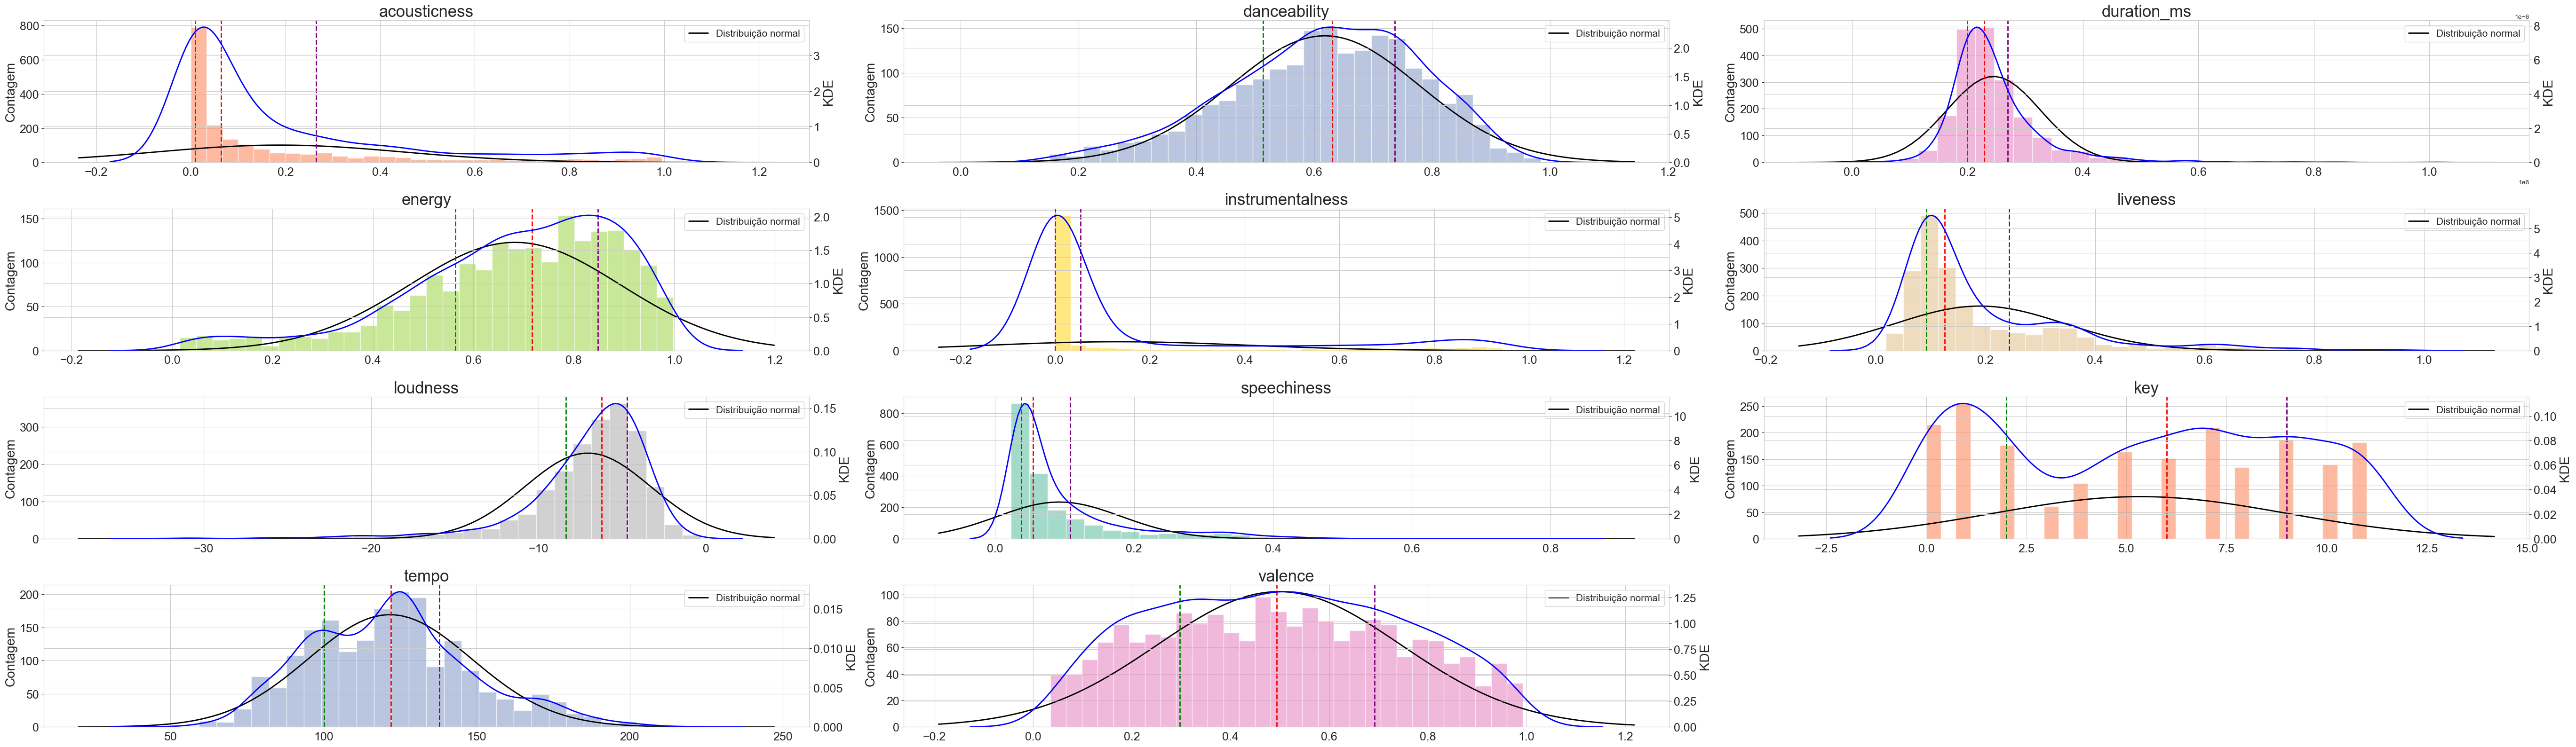

In [148]:
sns.set_style("whitegrid")

num_cols = len(numerical_columns)
num_rows = num_cols // 3 + (num_cols % 3 > 0)

plt.figure(figsize=(5 * num_cols, 4 * num_rows))

for i, col in enumerate(numerical_columns, 1):
    ax1 = plt.subplot(num_rows, 3, i)
    data = df[col].dropna()

    # Histograma
    n, bins, patches = ax1.hist(data, bins=30, alpha=0.6, color=sns.color_palette("Set2")[i % len(sns.color_palette("Set2"))])
    ax1.set_ylabel('Contagem', fontsize=20)
    ax1.tick_params(axis='y', labelsize=18)

    # KDE
    ax2 = ax1.twinx()
    sns.kdeplot(data, ax=ax2, color='blue', lw=2, label='KDE')
    ax2.set_ylabel('KDE', fontsize=20)
    ax2.tick_params(axis='y', labelsize=18)

    # Distribuição normal
    mean, std = stats.norm.fit(data)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    bin_width = np.diff(bins)[0]
    scale = len(data) * bin_width
    p = stats.norm.pdf(x, mean, std) * scale
    ax1.plot(x, p, 'k', linewidth=2, label='Distribuição normal')

    # Plot dos quartis
    q1, median, q3 = np.percentile(data, [25, 50, 75])
    ax1.axvline(q1, color='green', linestyle='dashed', linewidth=2)
    ax1.axvline(median, color='red', linestyle='dashed', linewidth=2)
    ax1.axvline(q3, color='purple', linestyle='dashed', linewidth=2)

    ax1.set_title(col, fontsize=25)
    ax1.tick_params(axis='x', labelsize=18)
    ax1.legend(fontsize=15)

plt.tight_layout()
plt.show()

As variáveis **acousticness** e **instrumentalness** apresentam uma tendência central no histograma, enquanto outras variáveis apresentam distribuição mais próxima de uma normal.

A variável **key** (tonalidade da música) não apresenta distribuição interessante para análise. 

## Verificação dos outliers

C:\Users\ArturCosta\anaconda3\envs\compvis2\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


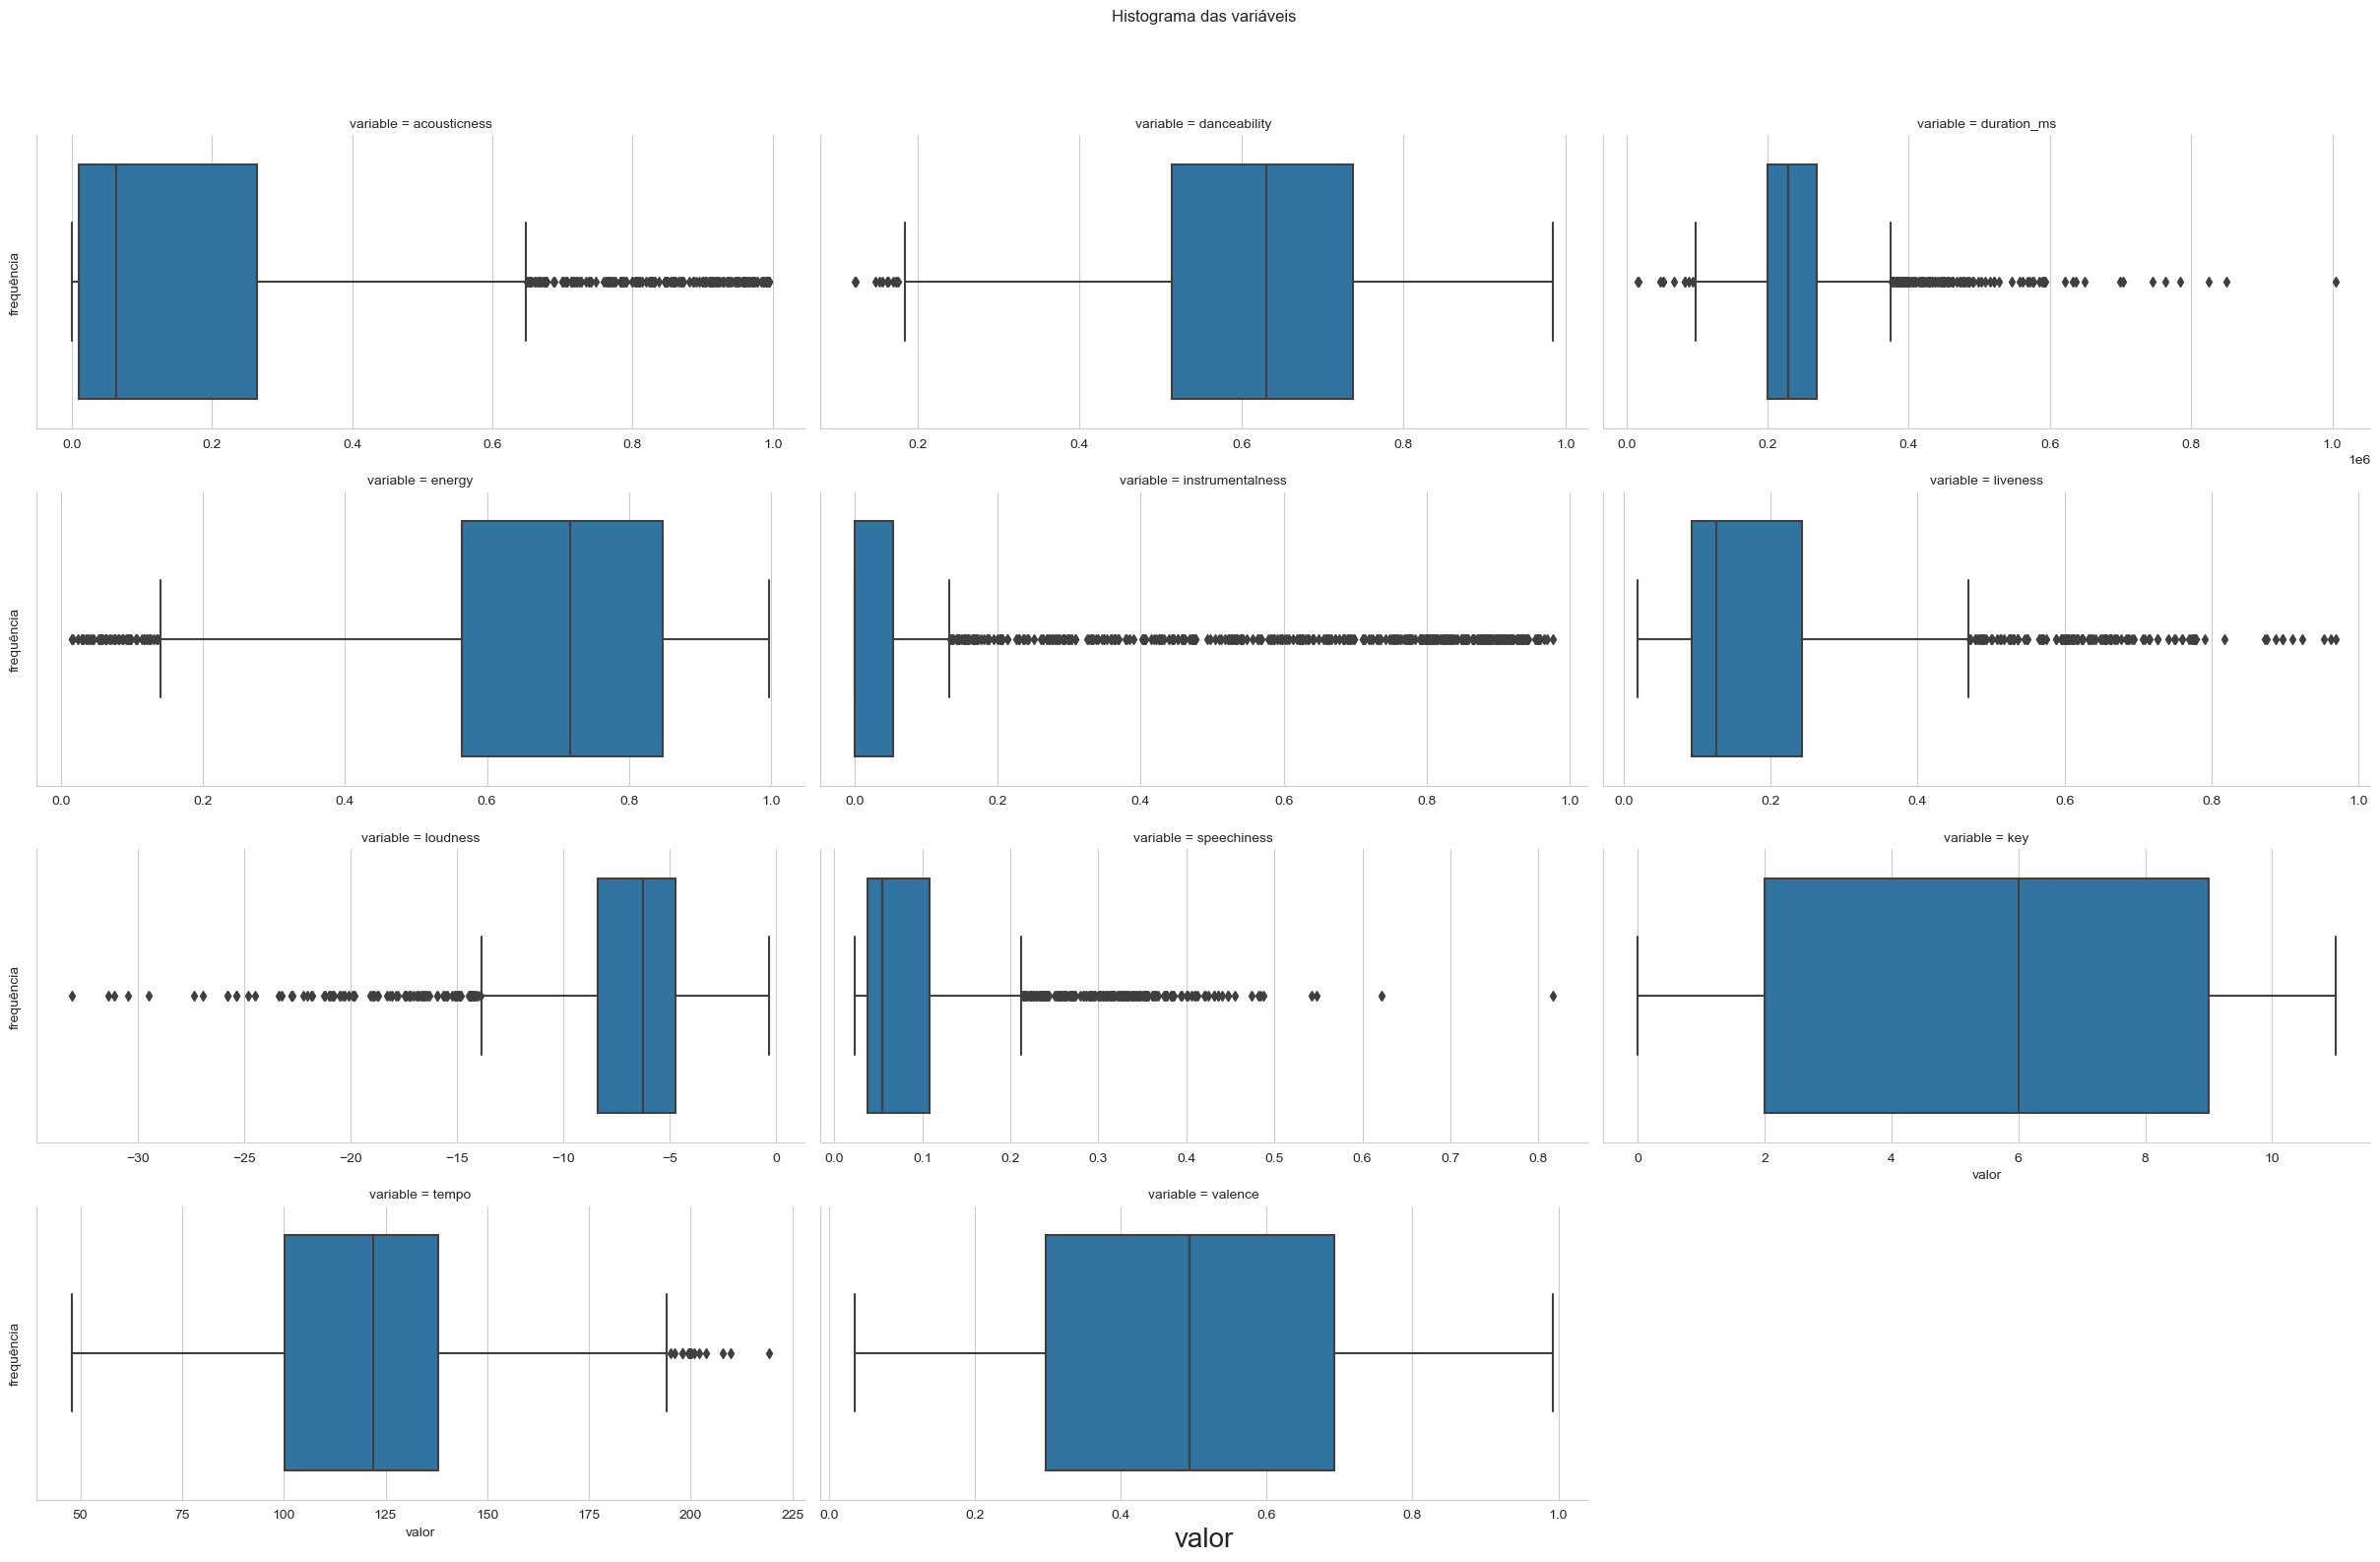

In [149]:
df_plot = pd.melt(df, id_vars = id_columns, value_vars= numerical_columns)

grid = sns.FacetGrid(data = df_plot, col='variable', col_wrap=3, sharex=False, sharey=False, height=4, aspect=2)

grid.map(sns.boxplot, 'value')

ax = plt.gca() 
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

grid.set_axis_labels('valor', 'frequência')
plt.subplots_adjust(top=0.9)
grid.fig.suptitle('Histograma das variáveis')
plt.show()

Analisando os outliers da variável **instrumentalness**, que apresentou uma alta centralização em torno de valores próximos de 0. 


In [150]:
Q1 = df['instrumentalness'].quantile(0.25)
Q3 = df['instrumentalness'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['instrumentalness'] < lower_bound) | (df['instrumentalness'] > upper_bound)]

#Printa os limites e os outliers
print(lower_bound)
print(upper_bound)

outliers.shape

-0.0798375
0.1330625


(411, 17)

Existem 411 outliers (aproximadamente 25% da base total). Como o valor mínimo que a variável assume é 0, só existem outliers acima do limite superior

In [151]:
outliers.drop(columns = ['pk','key','song_title','artist']).describe().reset_index()

index  acousticness  danceability   duration_ms      energy  \
0  count    411.000000    411.000000  4.110000e+02  411.000000   
1   mean      0.245196      0.578182  2.924314e+05    0.643220   
2    std      0.358172      0.185791  1.140618e+05    0.284716   
3    min      0.000005      0.122000  5.200600e+04    0.014800   
4    25%      0.002540      0.442000  2.157730e+05    0.496500   
5    50%      0.026900      0.589000  2.670000e+05    0.728000   
6    75%      0.425500      0.733500  3.410870e+05    0.878500   
7    max      0.995000      0.962000  1.004627e+06    0.997000   

   instrumentalness    liveness    loudness        mode  speechiness  \
0        411.000000  411.000000  411.000000  411.000000   411.000000   
1          0.612849    0.191535   -9.482574    0.583942     0.067466   
2          0.258981    0.163808    5.577037    0.493504     0.054217   
3          0.134000    0.022000  -33.097000    0.000000     0.026000   
4          0.382500    0.092550  -11.388500    0.000000     0.036850   
5          0.666000    0.117000   -8.102000    1.000000     0.047000   
6          0.849000    0.254500   -5.766500    1.000000     0.070750   
7          0.976000    0.924000   -0.787000    1.000000     0.406000   

        tempo  time_signature     valence      target  
0  411.000000      411.000000  411.000000  411.000000  
1  121.821745        3.934307    0.413593    0.661800  
2   24.844869        0.293117    0.271722    0.473673  
3   47.859000        3.000000    0.034800    0.000000  
4  108.396000        4.000000    0.176000    0.000000  
5  122.281000        4.000000    0.356000    1.000000  
6  130.063000        4.000000    0.626500    1.000000  
7  219.331000        5.000000    0.992000    1.000000

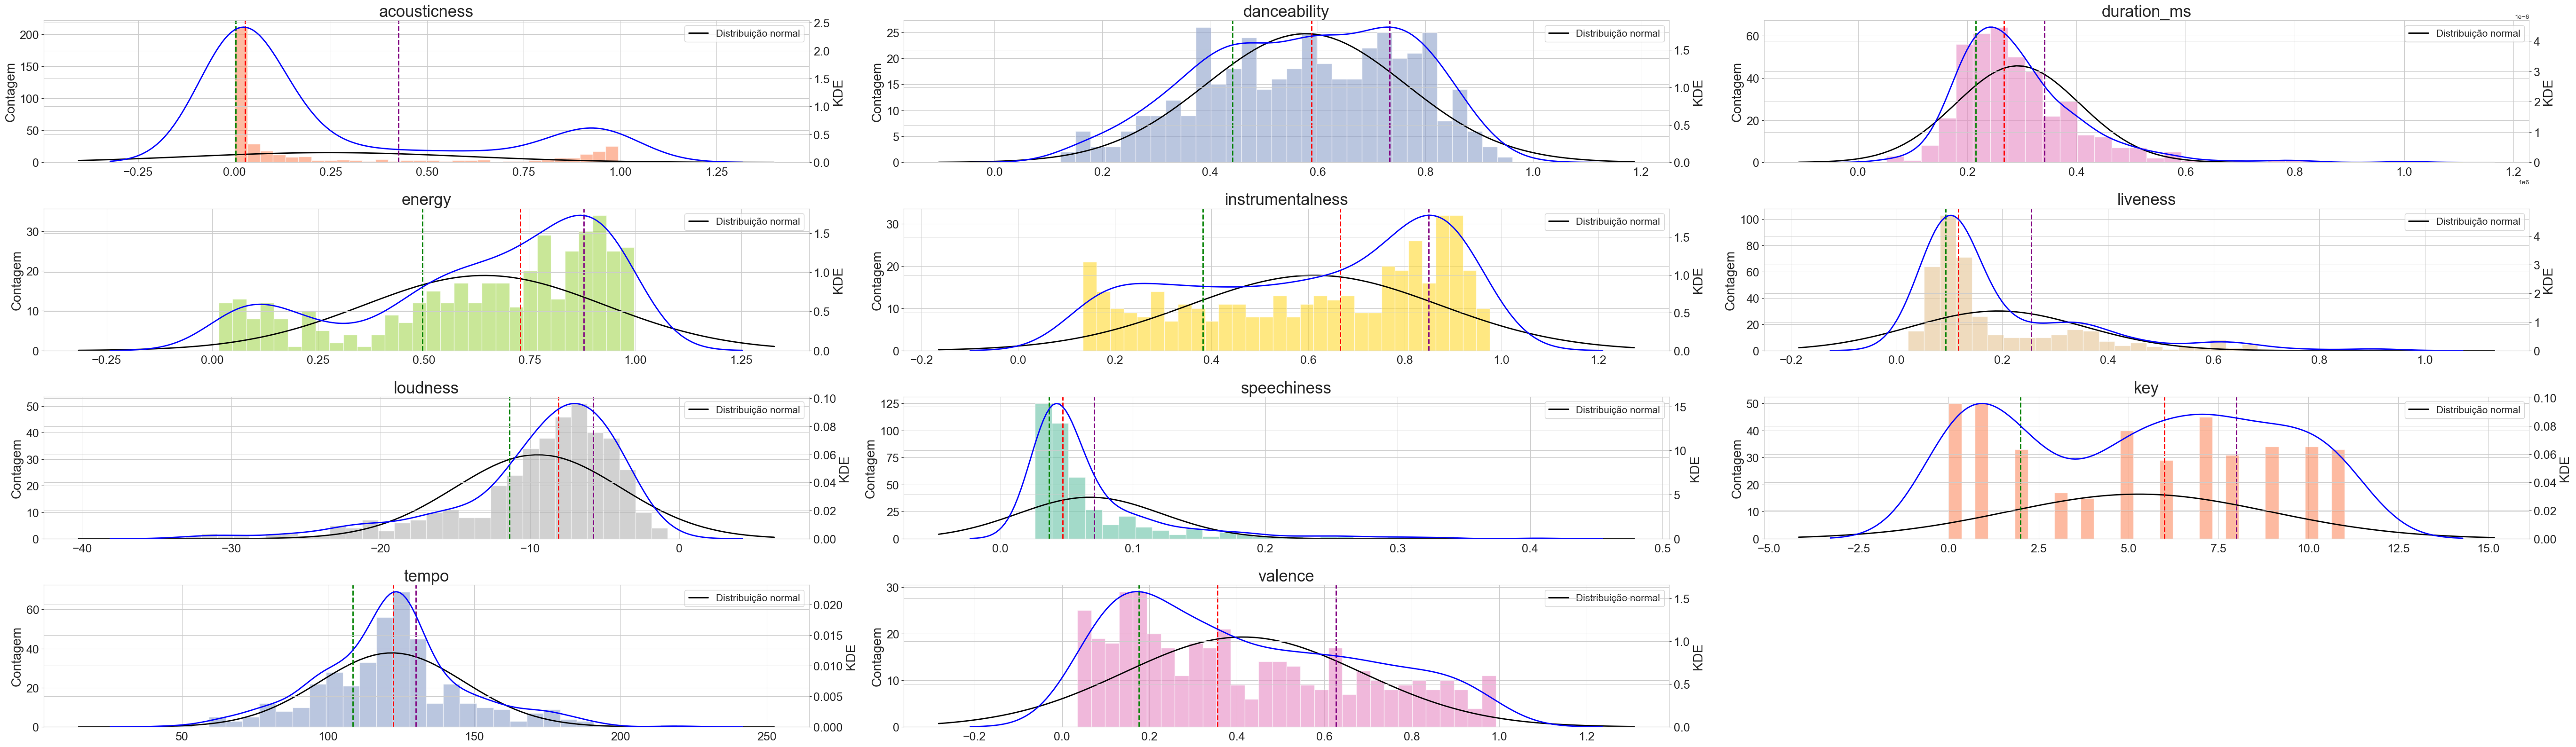

In [152]:
sns.set_style("whitegrid")

num_cols = len(numerical_columns)
num_rows = num_cols // 3 + (num_cols % 3 > 0)

plt.figure(figsize=(5 * num_cols, 4 * num_rows))

for i, col in enumerate(numerical_columns, 1):
    ax1 = plt.subplot(num_rows, 3, i)
    data = outliers[col].dropna()

    # Histograma
    n, bins, patches = ax1.hist(data, bins=30, alpha=0.6, color=sns.color_palette("Set2")[i % len(sns.color_palette("Set2"))])
    ax1.set_ylabel('Contagem', fontsize=20)
    ax1.tick_params(axis='y', labelsize=18)

    # KDE
    ax2 = ax1.twinx()
    sns.kdeplot(data, ax=ax2, color='blue', lw=2, label='KDE')
    ax2.set_ylabel('KDE', fontsize=20)
    ax2.tick_params(axis='y', labelsize=18)

    # Distribuição normal
    mean, std = stats.norm.fit(data)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    bin_width = np.diff(bins)[0]
    scale = len(data) * bin_width
    p = stats.norm.pdf(x, mean, std) * scale
    ax1.plot(x, p, 'k', linewidth=2, label='Distribuição normal')

    # Plot dos quartis
    q1, median, q3 = np.percentile(data, [25, 50, 75])
    ax1.axvline(q1, color='green', linestyle='dashed', linewidth=2)
    ax1.axvline(median, color='red', linestyle='dashed', linewidth=2)
    ax1.axvline(q3, color='purple', linestyle='dashed', linewidth=2)

    ax1.set_title(col, fontsize=25)
    ax1.tick_params(axis='x', labelsize=18)
    ax1.legend(fontsize=15)

plt.tight_layout()
plt.show()

Responder a pergunta: Os outliers dessa variável representam qual porcentagem dos outliers de outras variáveis com tendência muito centralizada, como por exemplo **acousticness** e **speechiness**?

Ou seja: As variáveis compartilham os mesmos outliers? 

### Acousticness

In [153]:
Q1 = df['acousticness'].quantile(0.25)
Q3 = df['acousticness'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_acousticness = df[(df['acousticness'] < lower_bound) | (df['acousticness'] > upper_bound)]
print(lower_bound)
print(upper_bound)

outliers_acousticness.shape

-0.37339375
0.6480362500000001


(189, 17)

Assim como no caso de **instrumentalness**, a variável **acousticness** apresenta apenas outliers acima do limite superior. 
Os outliers totalizem um pouco menos de 10% da base

In [154]:
common_outliers = pd.merge(outliers, outliers_acousticness, how='inner')
common_outliers.shape[0]/outliers_acousticness.shape[0]

0.4444444444444444

**44,5%** dos outliers de **acousticness** também são outliers de **instrumentallness**

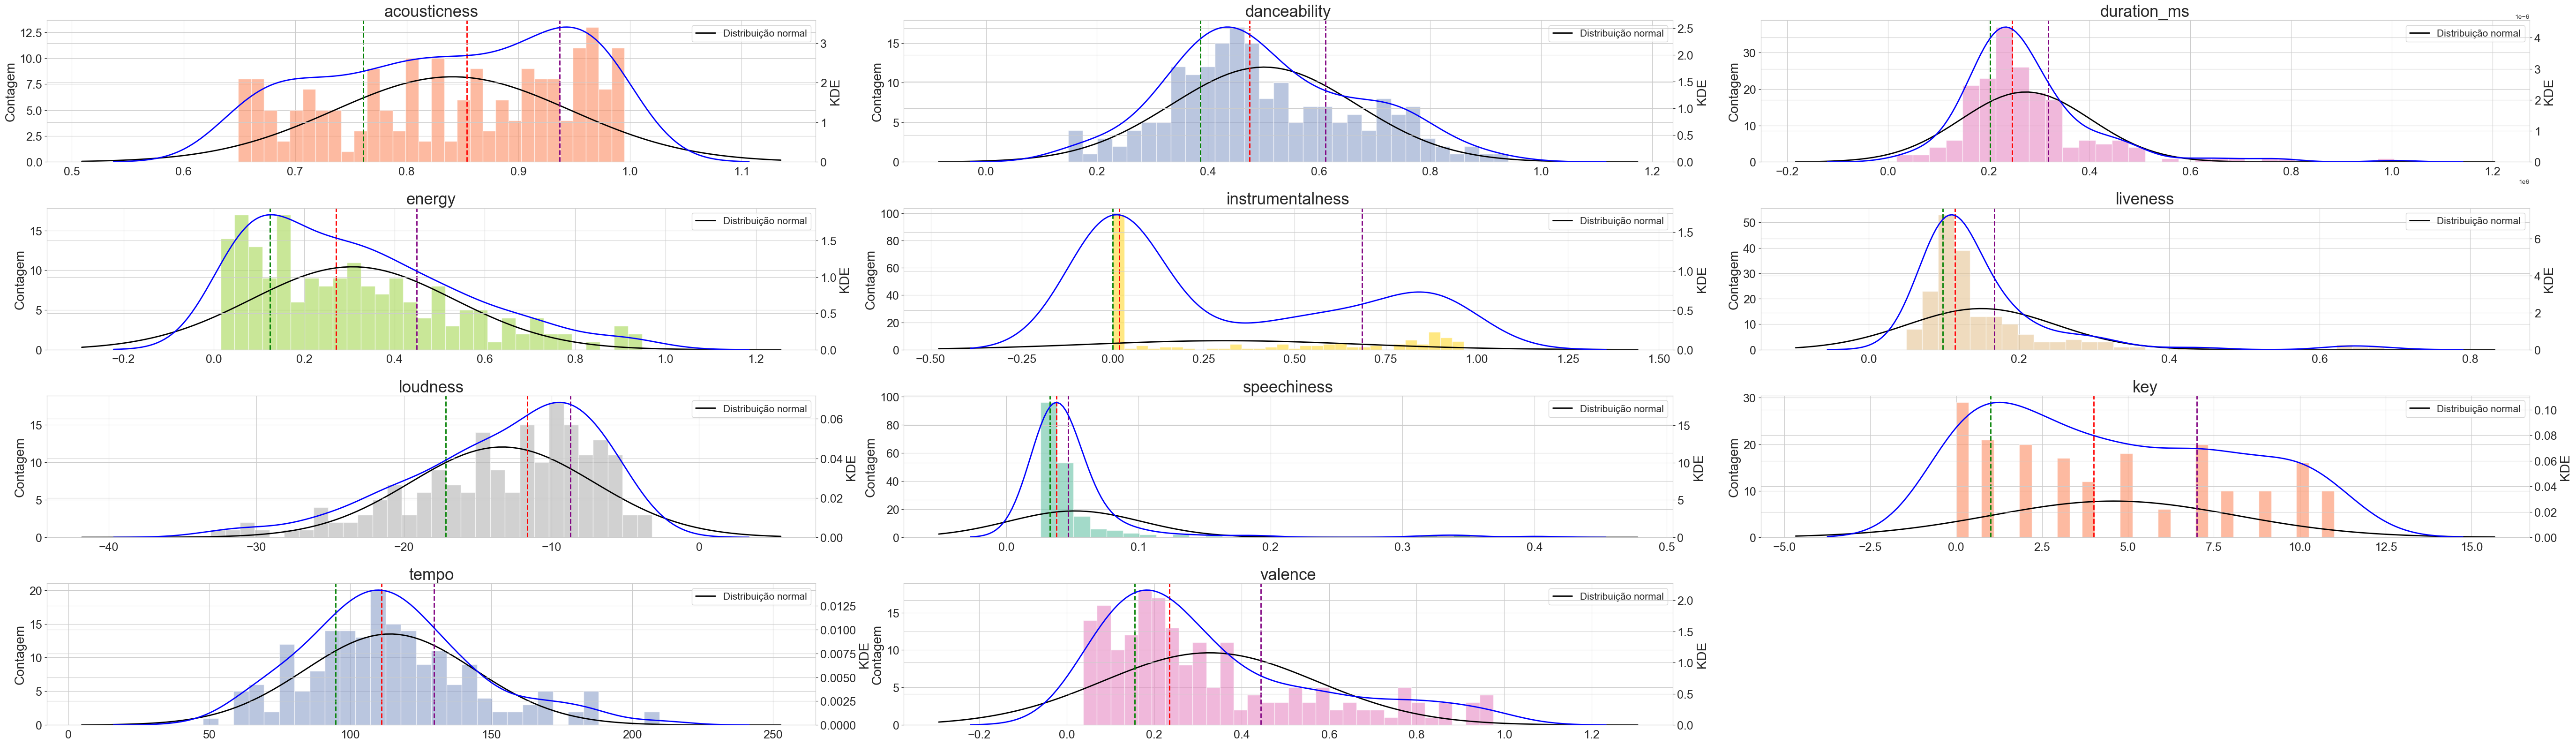

In [155]:
sns.set_style("whitegrid")

num_cols = len(numerical_columns)
num_rows = num_cols // 3 + (num_cols % 3 > 0)

plt.figure(figsize=(5 * num_cols, 4 * num_rows))

for i, col in enumerate(numerical_columns, 1):
    ax1 = plt.subplot(num_rows, 3, i)
    data = outliers_acousticness[col].dropna()

    # Histograma
    n, bins, patches = ax1.hist(data, bins=30, alpha=0.6, color=sns.color_palette("Set2")[i % len(sns.color_palette("Set2"))])
    ax1.set_ylabel('Contagem', fontsize=20)
    ax1.tick_params(axis='y', labelsize=18)

    # KDE
    ax2 = ax1.twinx()
    sns.kdeplot(data, ax=ax2, color='blue', lw=2, label='KDE')
    ax2.set_ylabel('KDE', fontsize=20)
    ax2.tick_params(axis='y', labelsize=18)

    # Distribuição normal
    mean, std = stats.norm.fit(data)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    bin_width = np.diff(bins)[0]
    scale = len(data) * bin_width
    p = stats.norm.pdf(x, mean, std) * scale
    ax1.plot(x, p, 'k', linewidth=2, label='Distribuição normal')

    # Plot dos quartis
    q1, median, q3 = np.percentile(data, [25, 50, 75])
    ax1.axvline(q1, color='green', linestyle='dashed', linewidth=2)
    ax1.axvline(median, color='red', linestyle='dashed', linewidth=2)
    ax1.axvline(q3, color='purple', linestyle='dashed', linewidth=2)

    ax1.set_title(col, fontsize=25)
    ax1.tick_params(axis='x', labelsize=18)
    ax1.legend(fontsize=15)

plt.tight_layout()
plt.show()

### Speechiness

In [156]:
Q1 = df['speechiness'].quantile(0.25)
Q3 = df['speechiness'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_speechiness = df[(df['speechiness'] < lower_bound) | (df['speechiness'] > upper_bound)]
print(lower_bound)
print(upper_bound)

outliers_speechiness.shape

-0.06825
0.21375


(206, 17)

Assim como no caso das outras variáveis, só existem outliers acima do limite superior
Os outliers totalizam um pouco mais de 10% da base

In [157]:
common_outliers = pd.merge(outliers, outliers_speechiness, how='inner')
common_outliers.shape[0]/outliers_speechiness.shape[0]

0.06796116504854369

In [158]:
common_outliers = pd.merge(outliers_acousticness, outliers_speechiness, how='inner')
common_outliers.shape[0]/outliers_speechiness.shape[0]

0.019417475728155338

6,8% dos outliers de instrumentalness também são outliers de speechiness

2% dos outliers de acousticness também são outliers de speechiness

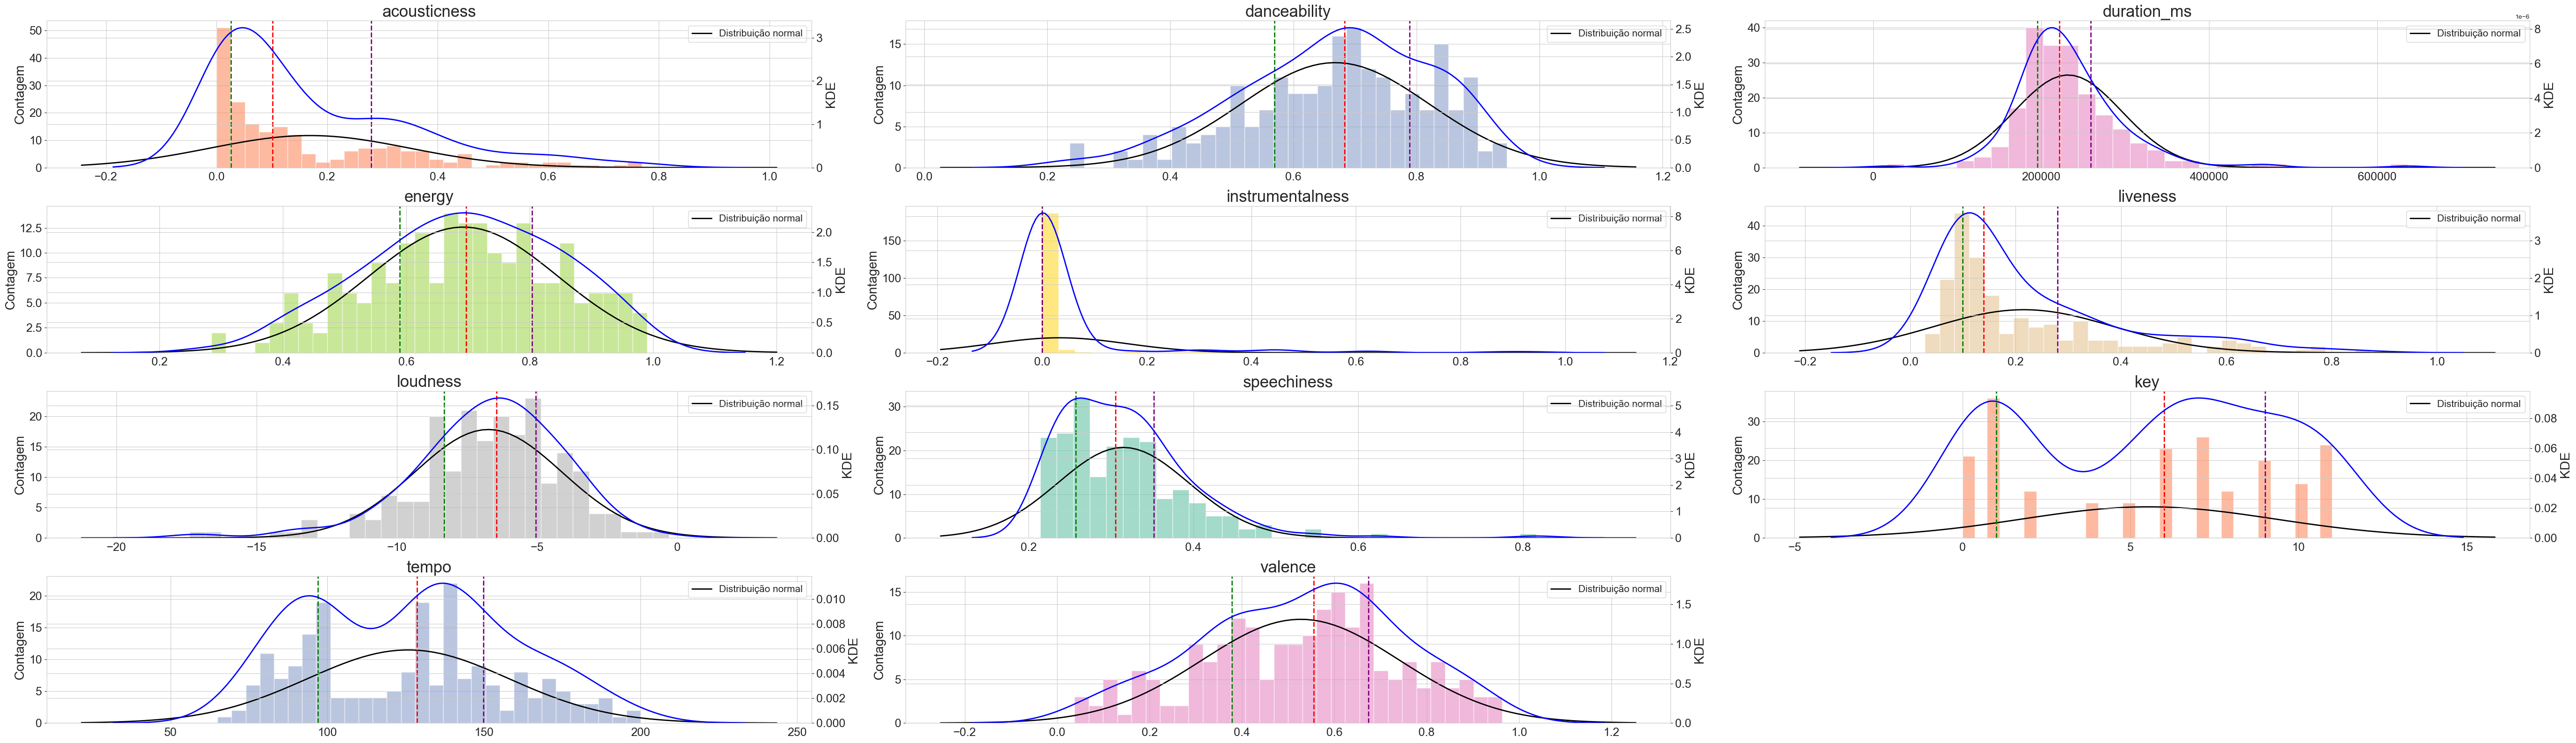

In [159]:
sns.set_style("whitegrid")

num_cols = len(numerical_columns)
num_rows = num_cols // 3 + (num_cols % 3 > 0)

plt.figure(figsize=(5 * num_cols, 4 * num_rows))

for i, col in enumerate(numerical_columns, 1):
    ax1 = plt.subplot(num_rows, 3, i)
    data = outliers_speechiness[col].dropna()

    # Histograma
    n, bins, patches = ax1.hist(data, bins=30, alpha=0.6, color=sns.color_palette("Set2")[i % len(sns.color_palette("Set2"))])
    ax1.set_ylabel('Contagem', fontsize=20)
    ax1.tick_params(axis='y', labelsize=18)

    # KDE
    ax2 = ax1.twinx()
    sns.kdeplot(data, ax=ax2, color='blue', lw=2, label='KDE')
    ax2.set_ylabel('KDE', fontsize=20)
    ax2.tick_params(axis='y', labelsize=18)

    # Distribuição normal
    mean, std = stats.norm.fit(data)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    bin_width = np.diff(bins)[0]
    scale = len(data) * bin_width
    p = stats.norm.pdf(x, mean, std) * scale
    ax1.plot(x, p, 'k', linewidth=2, label='Distribuição normal')

    # Plot dos quartis
    q1, median, q3 = np.percentile(data, [25, 50, 75])
    ax1.axvline(q1, color='green', linestyle='dashed', linewidth=2)
    ax1.axvline(median, color='red', linestyle='dashed', linewidth=2)
    ax1.axvline(q3, color='purple', linestyle='dashed', linewidth=2)

    ax1.set_title(col, fontsize=25)
    ax1.tick_params(axis='x', labelsize=18)
    ax1.legend(fontsize=15)

plt.tight_layout()
plt.show()

### Conclusões
Após analisar os outliers das variáveis com tendências centrais: 
- Quase metade dos outliers em acousticness também são outliers em instrumentalness
- Não há relação no entanto, com os outliers de speechiness
- A alta concentração de dados nessas variáveis pode reduzir seu poder de impacto em modelos de classificação
- Os outliers de outras variáveis não apresentam grande potencial de estarem relacionados entre si, devido à distribuição dos dados
- A alta variação não indica erros, apenas diferenças de características peculiares entre as músicas. Ou seja, não existe um subset dos dados que se comporta de forma muito diferente dos demais
- Variáveis com muitos outliers, como por exemplo **instrumentallness** (25% da base) se adequam menos à alguns métodos estatísticos de correlação e redução de dimensionalidade. Porém, mesmo com a alta concentração dos dados, não recomenda-se descartar a variável das análises pois os dados esparsos ainda podem estar correlacionados de alguma forma com a variável de resposta

## Variáveis categóricas

As variáveis categóricas apresentam importância para investigações em uma eventual modelagem para classificação das músicas, pois 
podem haver correlações entre as categorias e a variável que indica que a música foi curtida pelo usuário

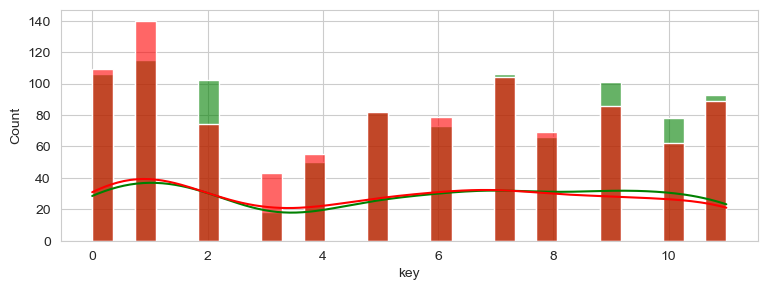

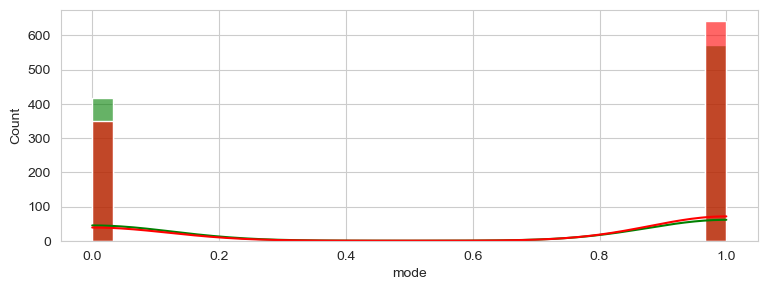

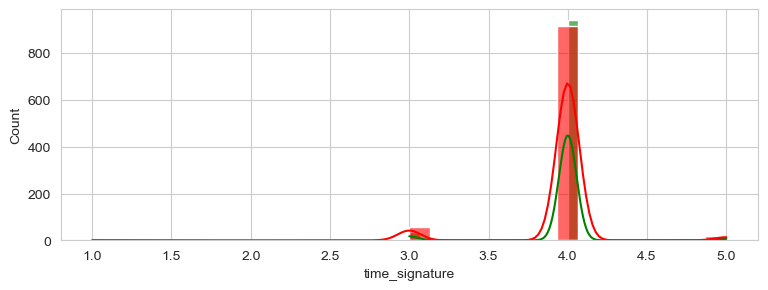

In [160]:
categorical_columns = ['key', 'mode', 'time_signature']
for col in categorical_columns:
    targeted=df[df['target']==1][col]
    not_targeted=df[df['target']==0][col]
    
    plt.figure(figsize=(9,3))
    sns.histplot(targeted,bins=30,alpha=0.6,color="green", kde=True)
    sns.histplot(not_targeted,bins=30,alpha=0.6,color="red", kde=True)
    
    plt.show()


**time_signature**: 
A maioria das músicas apresentam compasso 4/4. No então, não parece haver relação entre o 
compasso da música e a variável **target**

**key**: D# apresenta uma quantidade de músicas muito menor que outras tonalidades.

**mode**: Músicas menores estão presentes em menor quantidade, e apresentam mais músicas curtidas proporcionalmente.

## Matriz de correlação

In [161]:
# Inclusão da coluna de target para entender se alguma variável tem relação direta com o usuário gostar ou não da música
numerical_columns = ['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness', 'key', 'tempo', 'valence', 'target']


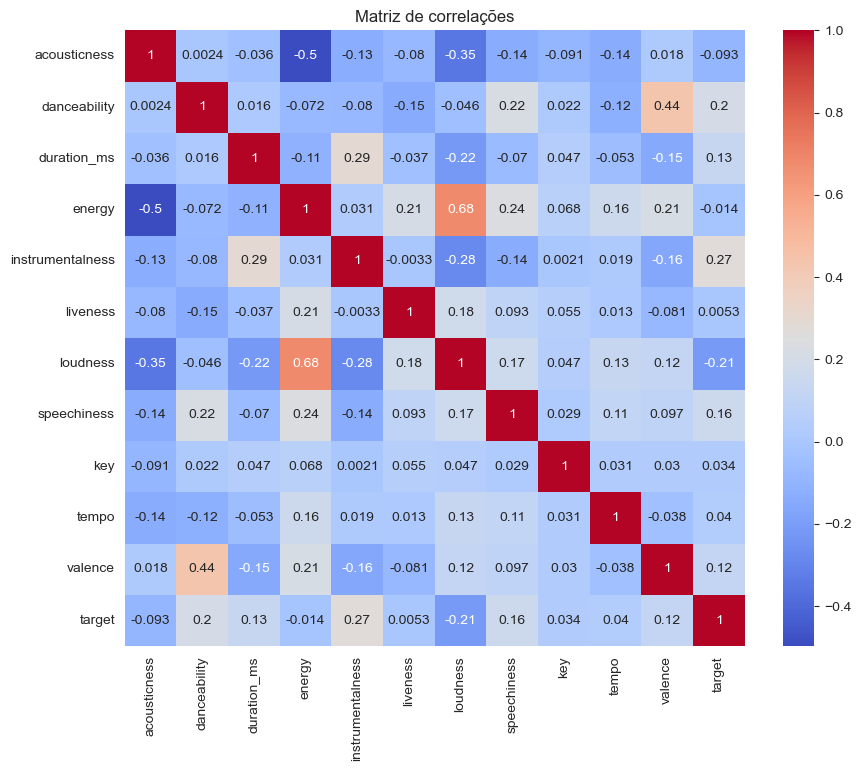

In [162]:
plt.figure(figsize=(10, 8))

sns.heatmap(df[numerical_columns].corr(method = 'spearman'), annot=True, cmap='coolwarm')
plt.title("Matriz de correlações")
plt.show()

In [163]:
df['target'].corr(df['mode'], method = 'spearman')

-0.07227827973018236

Como há correlação média positiva entre a variável target e instrumentallness, e instrumentallness apresenta tendência central em pontos próximos de 0, analisaram-se os outliers dessa variável quanto à variável target

<AxesSubplot: xlabel='instrumentalness', ylabel='Count'>

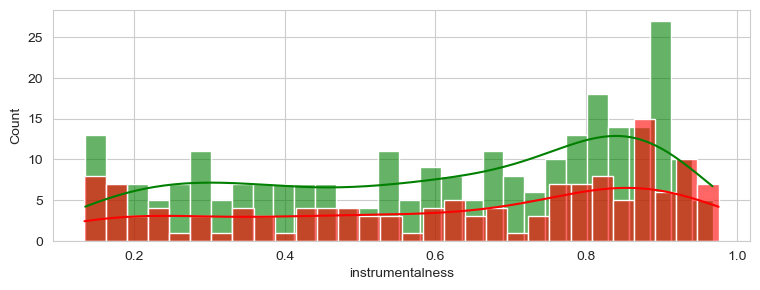

In [164]:
targeted=outliers[outliers['target']==1]['instrumentalness']
not_targeted=outliers[outliers['target']==0]['instrumentalness']
    
plt.figure(figsize=(9,3))
sns.histplot(targeted,bins=30,alpha=0.6,color="green", kde=True)
sns.histplot(not_targeted,bins=30,alpha=0.6,color="red", kde=True)

In [165]:
df_not_outliers= df[~df.isin(outliers).all(axis=1)]

<AxesSubplot: xlabel='instrumentalness', ylabel='Count'>

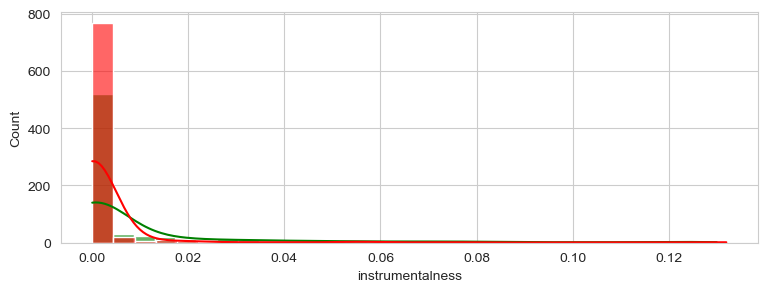

In [166]:
targeted=df_not_outliers[df_not_outliers['target']==1]['instrumentalness']
not_targeted=df_not_outliers[df_not_outliers['target']==0]['instrumentalness']
    
plt.figure(figsize=(9,3))
sns.histplot(targeted,bins=30,alpha=0.6,color="green", kde=True)
sns.histplot(not_targeted,bins=30,alpha=0.6,color="red", kde=True)

Grande quantidade das músicas não curtidas estão no grupo que não pertence aos outliers da variável **instrumentallness**

### Conclusões iniciais
Pergunta:
Quais variáveis apresentam comportamento correlacionado, ou seja, se movem na mesma direção ou direção oposta?

Correlação positiva forte: 
- loudness e energy - Ou seja, entre a energia e a intensidade da música.

Correlação negativa forte: 
- loudness e acousticness - Ou seja, conforme as propriedades acústicas crescem a música tende a ser menos intensa
- energy e acousticness - Análogo

Correlação positiva média: 
- instrumentalness e duration_ms
- energy e liveness

Correlação negativa média: 
- loudness e duration_ms
- instrumentalness e liveness


Além disso, pode-se destacar que a variável categórica de target apresenta relação fraca com algumas variáveis, por exemplo **danceability**, **duration_ms**, **instrumentalness** e **speechiness**. Esse comportamento pode sugerir algumas perguntas a serem respondidas:
- O usuário prefere músicas curtas?
- O usuário prefere músicas mais instrumentais?
- O usuário prefere músicas dançáveis? 

In [167]:
corr_columns = ['acousticness','duration_ms','energy','instrumentalness','liveness','loudness']

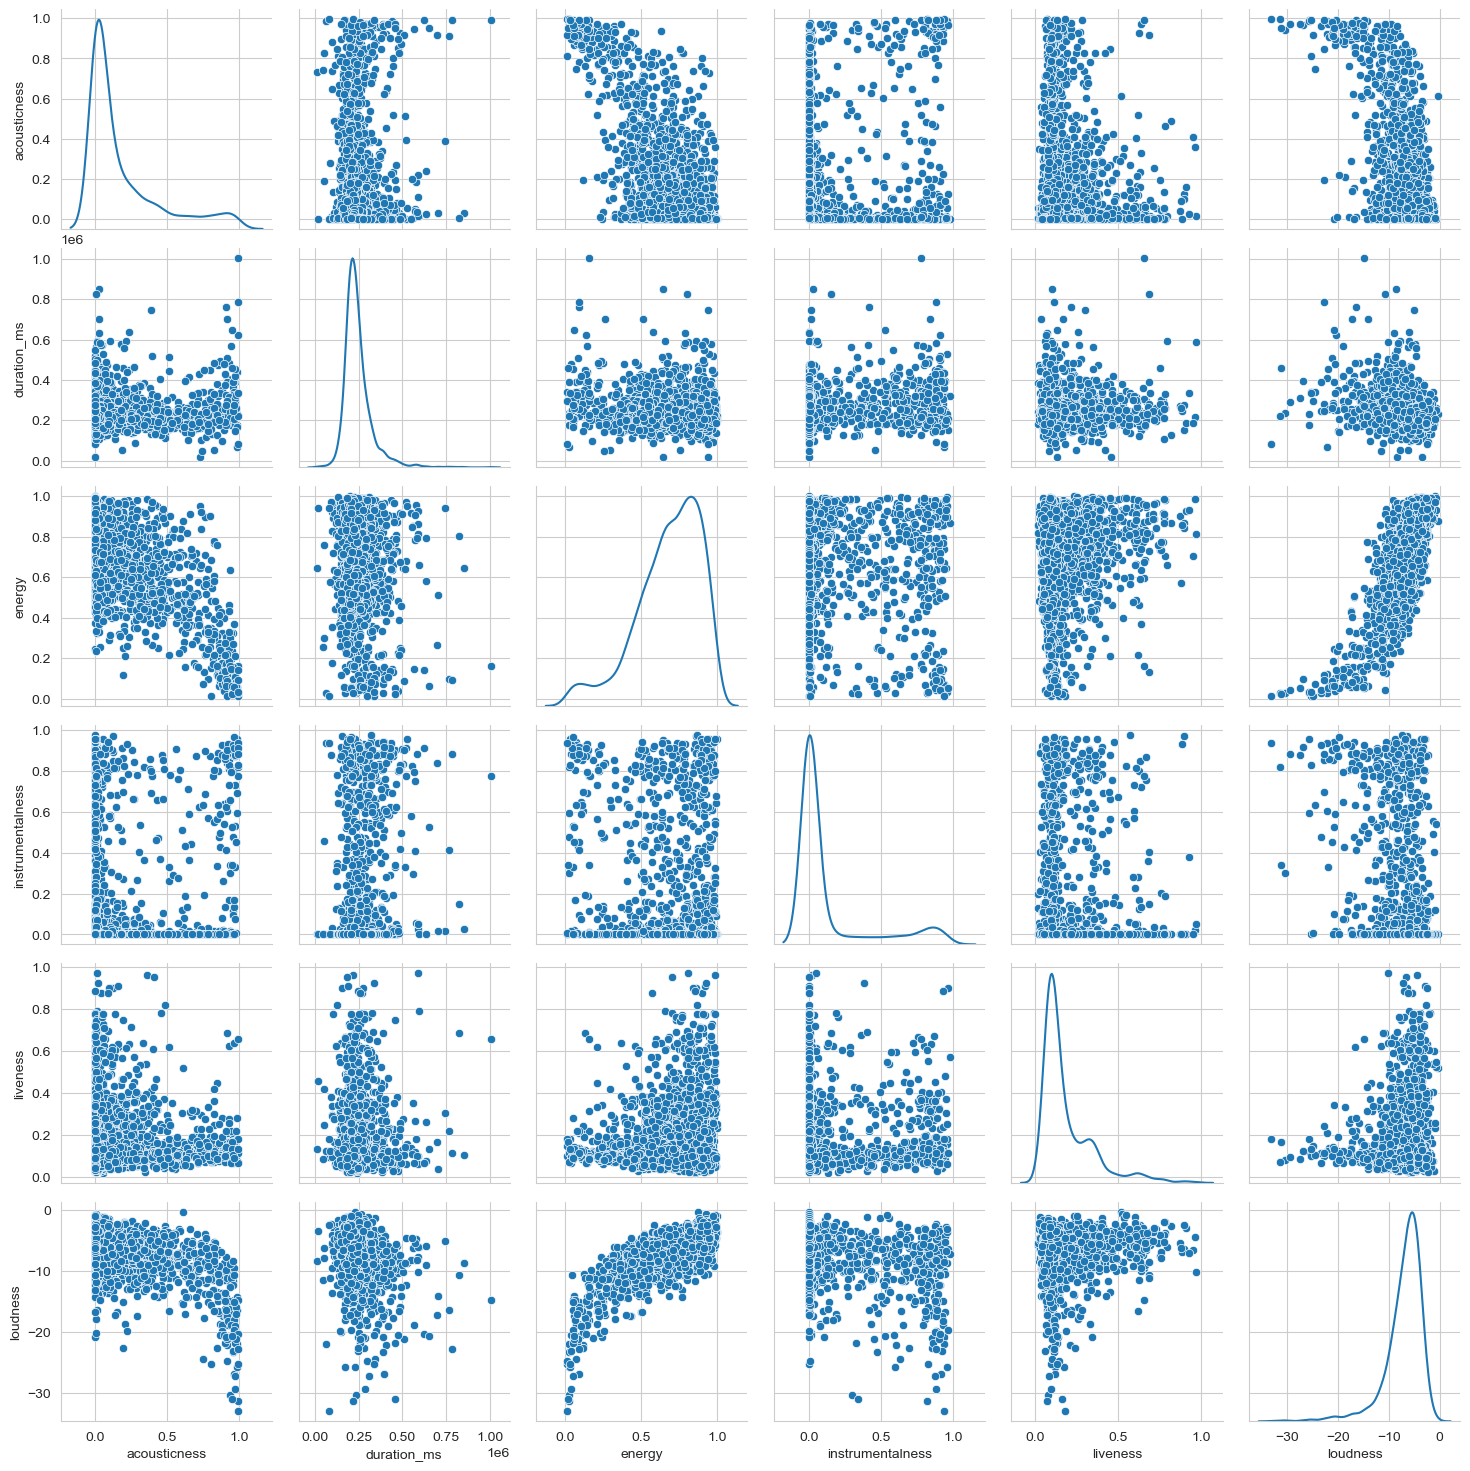

In [168]:
gr = sns.PairGrid(df[corr_columns], diag_sharey=False)
gr.map_upper(sns.scatterplot)
gr.map_lower(sns.scatterplot)
gr.map_diag(sns.kdeplot)

plt.show()


- Quais próximos passos no EDA?
  Análise de principais componentes?

- Possibilidades de modelagem:
    - Classificação supervisionada: Entender se para determinados parâmetros a música será curtida ou não pelo usuário
    - Clusterização não supervisionada: Clusterizar as músicas em grupos a partir de características.

No caso de alguma dessas modelagens, para variáveis que já estão normalizadas, mas apresentam muita tendência central, em quais casos pode ser interessante adotar outro tipo de normalização?



## Redução de dimensionalidade

### PCA
O Método PCA - Análise de Componentes Principais - basicamente transforma o conjunto de variáveis originais em outro conjunto de variáveis que são combinações lineares das originais. Os componentes principais nada mais são do que os autovetores da matriz de covariância das variáveis originais dos dados. Os autovalores dizem respeito à quando os autovetores são responsáveis por "escalar" os dados em sua direção, determinando a importância daquele componente em relação aos demais. Os elementos principais são ordenados em ordem dos maiores autovalores da matriz de covariância, representando a maior parcela de variância nos dados originais de forma decrescente.

O método PCA utiliza a matriz de covariância para entender as relações mútuas entre todas as variáveis do conjunto de dados, pois ela quantifica o grau em que as variáveis do conjunto de dados variam ou se movem juntas: 

\begin{equation}
Cov_{x,y} = \frac{\sum_i({x_i-\bar{x}}) \cdot \sum_i({y_i-\bar{y}})}{N-1}
\end{equation}

Usando essa matrizo PCA é capaz de identificar e quantificar as correlações entre as diferentes variáveis. Ao fazer isso,  pode-se então transformar o conjunto de dados original em um novo conjunto de variáveis que são combinações lineares das originais. Estas novas variáveis, ou componentes principais, são criadas de tal forma que são estatisticamente não correlacionadas (ortogonais), efetivamente removendo as correlações que existiam entre as variáveis no conjunto de dados original.

O objetivo final é reduzir a quantidade de dimensões/features em conjunto de dados com alta dimensionalidade, mantendo a maior quantidade de informações possível. Isso se dá por meio da manutenção de componentes principais que representam parte significativa da variância dos dados. 

No exemplo do caso abaixo, a transformação de variáveis mostra que a maior parte da variabilidade dos dados é explicada na componente principal PC1 (combinação linear de x e y), e a depender da análise, a variável PC2 poderia ser descartada.

![title](pca.png)



**Limitações:** 
- As variáveis devem estar normalizadas pois o método é altamente sensível à escala. Por exemplo, ao usar uma variável categórica que varia de 0 a 11, ela seria muito mais influente (os autovalores associados a ela seriam muito maiores) do que qualquer variável normalizada de 0 a 1. 
- O método pressupõe distribuição normal dos dados das variáveis analisadas
- O método pressupõe que as correlações entre as variáveis são lineares, o que já foi verificado que não é verdadeiro para os dados em questão. No caso de relações logarítmicas como é o caso de **loudness** e **energy**, os dados podem ser linearizados facilmente. 
- Outliers podem influenciar o resultado dos componentes principais (alterando o módulo dos autovalores) - similar ao problema de escala. Como visto anteriormente, os dados tem outliers da ordem de 25% para algumas variáveis, que não podem ser desprezados.

**Interpretabilidade:**

A transformação de variáveis pode tornar os componentes principais mais difíceis de interpretar do que as features originais, que tem sentido semântico. No entanto, isso não é problema para sua utilização em modelos preditivos. 

Normalização dos dados para aplicação do método

In [169]:
df['energy_log'] = np.log(df['energy'])
df['loudness_log'] = np.log(-df['loudness'])
df_norm = df.copy()
scaler = MinMaxScaler()
df_norm[['tempo','duration_ms','loudness', 'loudness_log', 'energy_log']] = scaler.fit_transform(df_norm[['tempo','duration_ms','loudness', 'loudness_log', 'energy_log']]

In [170]:
df_norm.describe()

acousticness  danceability  duration_ms       energy  instrumentalness  \
count   1982.000000   1982.000000  1982.000000  1982.000000       1982.000000   
mean       0.187372      0.618086     0.232143     0.683045          0.133040   
std        0.259505      0.160759     0.082134     0.210360          0.272980   
min        0.000003      0.122000     0.000000     0.014800          0.000000   
25%        0.009643      0.513250     0.185788     0.564250          0.000000   
50%        0.063700      0.631000     0.215331     0.717000          0.000074   
75%        0.265000      0.737000     0.256493     0.848000          0.053225   
max        0.995000      0.984000     1.000000     0.998000          0.976000   

               key     liveness     loudness         mode  speechiness  \
count  1982.000000  1982.000000  1982.000000  1982.000000  1982.000000   
mean      5.336529     0.189899     0.793910     0.613017     0.092549   
std       3.651567     0.154757     0.114953     0.487183     0.089439   
min       0.000000     0.018800     0.000000     0.000000     0.023100   
25%       2.000000     0.092100     0.753927     0.000000     0.037500   
50%       6.000000     0.126000     0.819091     1.000000     0.054900   
75%       9.000000     0.243000     0.865317     1.000000     0.108000   
max      11.000000     0.969000     1.000000     1.000000     0.816000   

             tempo  time_signature      valence       target   energy_log  \
count  1982.000000     1982.000000  1982.000000  1982.000000  1982.000000   
mean      0.430629        3.967205     0.498598     0.499495     0.889451   
std       0.155699        0.257025     0.247062     0.500126     0.122289   
min       0.000000        1.000000     0.034800     0.000000     0.000000   
25%       0.305341        4.000000     0.297000     0.000000     0.864583   
50%       0.432091        4.000000     0.494000     0.000000     0.921475   
75%       0.525188        4.000000     0.692000     1.000000     0.961323   
max       1.000000        5.000000     0.992000     1.000000     1.000000   

       loudness_log  
count   1982.000000  
mean       0.645450  
std        0.101899  
min        0.000000  
25%        0.584017  
50%        0.643483  
75%        0.706410  
max        1.000000

Visualização da correlação linearizada

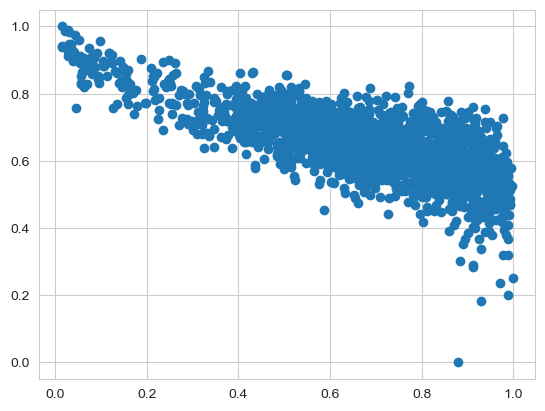

In [171]:
plt.scatter(df_norm['energy'], df_norm['loudness_log'])
plt.show()

In [172]:
pca = PCA(n_components = None, 
          copy = True,        
          random_state = 0) 

In [173]:
numerical_columns = ['acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness_log','speechiness', 'tempo', 'valence']
df_norm = df_norm[numerical_columns]

In [174]:
pca.fit(df_norm)

PCA(random_state=0)

In [175]:
print(pca.n_components_)

10


In [176]:
var_acum = np.round(np.cumsum(pca.explained_variance_ratio_),3)

df_variancia = pd.DataFrame({
                      'Variância Explicada':np.round(pca.explained_variance_ratio_,3),
                      'Variância acumulada': var_acum})


display(df_variancia)

Variância Explicada  Variância acumulada
0                0.334                0.334
1                0.208                0.542
2                0.164                0.706
3                0.083                0.790
4                0.069                0.859
5                0.052                0.911
6                0.040                0.952
7                0.021                0.973
8                0.017                0.990
9                0.010                1.000

Impacto das variáveis originais em cada componente principal

In [177]:
df_pc_originalVariables = pd.DataFrame(pca.components_,
                     index=df_norm.columns)
df_pc_originalVariables

0         1         2         3         4         5  \
acousticness      0.602879 -0.156812  0.057155 -0.476471  0.420416 -0.064884   
danceability     -0.456234 -0.144771  0.060847  0.323675  0.734936  0.121941   
duration_ms       0.147605  0.319507  0.045514 -0.029088  0.515073 -0.111841   
energy            0.465442 -0.471215 -0.068999  0.358743  0.004764  0.418390   
instrumentalness  0.075439  0.054459  0.038214  0.094964  0.000417  0.636550   
liveness         -0.162645  0.401475  0.059429 -0.407978 -0.004671  0.609528   
loudness_log     -0.390732 -0.657217  0.036466 -0.443904 -0.030527  0.085792   
speechiness      -0.026008 -0.172183 -0.109486 -0.017214  0.051901 -0.085355   
tempo             0.051036 -0.036985  0.947359  0.175296 -0.105112 -0.039087   
valence          -0.043211 -0.056802  0.265330 -0.367597  0.055681 -0.021651   

                         6         7         8         9  
acousticness      0.194361 -0.046984 -0.059015 -0.396523  
danceability     -0.067057 -0.023649  0.103428 -0.302770  
duration_ms       0.087307 -0.021242 -0.083817  0.761776  
energy           -0.163346  0.015424  0.405858  0.247286  
instrumentalness -0.036591 -0.015702 -0.757349 -0.022517  
liveness          0.155457  0.168416  0.466560 -0.025142  
loudness_log      0.265384 -0.166763 -0.086813  0.320852  
speechiness       0.071359  0.962535 -0.118993  0.041086  
tempo             0.213119  0.095296  0.026955  0.002245  
valence          -0.881463  0.067586 -0.019924  0.062197

Nota-se que nos componentes principais mais relevantes em termos de variância explicada, destacam-se as variáveis **acousticness**, **danceability**, **energy**, **loudness**, e **duration**

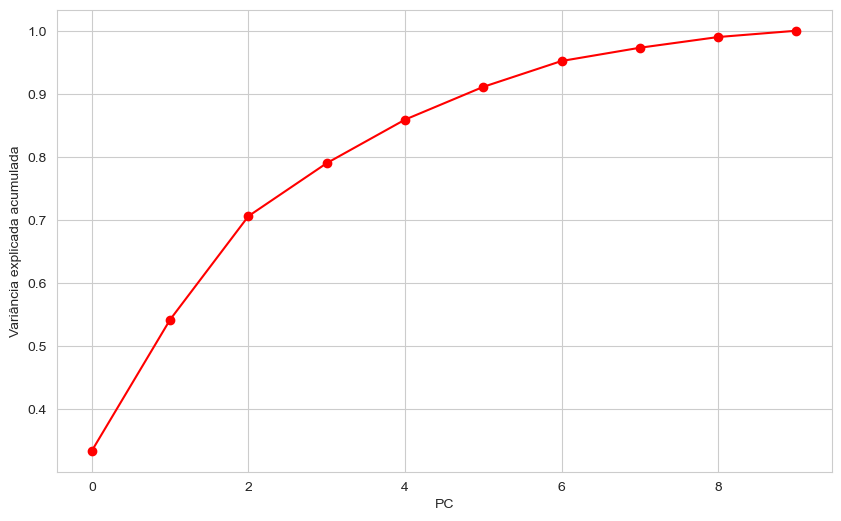

In [178]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(pca.n_components_),var_acum, 'ro-')
plt.xlabel('PC')
plt.ylabel('Variância explicada acumulada')
plt.grid(True)
plt.show()

É possível obter 95% da variância das variáveis originais com 7 componentes principais


### t-SNE (t-Distributed Stochastic Neighbor Embedding)

t-SNE é um método de redução de dimensionalidade que não apresenta algumas limitações do método PCA, como por exemplo a dependência da distribuição normal dos dados e a necessidade de relacionamento linear entre as variáveis. 

**Formulação Matemática:** O algoritmo t-SNE calcula a probabilidade de que pares de pontos de dados no espaço de alta dimensão estejam relacionados e, em seguida, escolhe um embedding de baixa dimensão que produza uma distribuição semelhante.

Etapa 1: No espaço de alta dimensão, as similaridades entre pares são calculadas como probabilidades condicionais. Para um ponto $x_j$, a probabilidade condicional $p{j|i}$ de que ele escolheria $x_i$ como seu vizinho é dada por:

\begin{equation}
p_{j|i} = \frac{exp(-||x_i - x_j||^2 / 2\sigma^2)}{\sum_{k \neq i} exp(-||x_i - x_k||^2 / 2\sigma^2)}
\end{equation}

onde  $||x_i - x_j||^2$ é a distância euclidiana entre $xi$ e $xj$, e $\sigma_i$ é a variância da Gaussiana que está centrada no ponto de dados xi.

Etapa 2: No espaço de baixa dimensão, o t-SNE define uma medida de similaridade entre pares semelhante. Para um ponto $y_i$, a probabilidade $q_{i|j}$ de que ele escolheria $y_j$ como seu vizinho é dada por:

\begin{equation}
q_{j|i} = \frac{(1 + ||y_i - y_j||^2)^{-1}}{\sum_{k \neq i} (1 + ||y_i - y_k||^2)^{-1}}
\end{equation}

onde $||y_i - y_j||^2$ é a distância euclidiana entre $y_i$ e $y_j$. Esta é uma distribuição t, daí o nome t-SNE.

Etapa 3: O t-SNE então minimiza a divergência entre as duas distribuições com respeito à localização dos pontos y no espaço de baixa dimensão. A função de custo é a divergência de Kullback-Leibler das probabilidades conjuntas nos espaços de alta e baixa dimensões, e a minimização é feita a partir do método de gradiente descendente.

Instanciamento do objeto tsne

In [179]:
tsne = TSNE(n_components=2,
            random_state=0)  

In [180]:
tsne_results = tsne.fit_transform(df_norm)

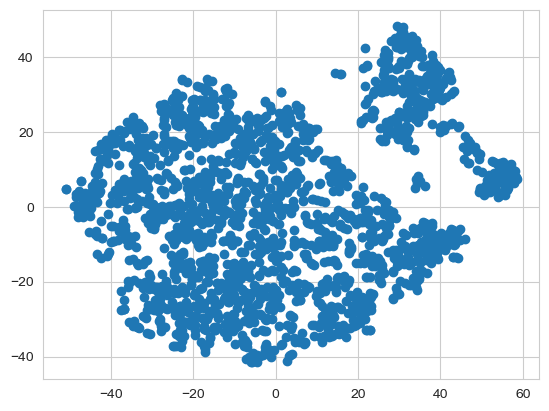

In [181]:
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.show()

In [182]:
tsne = TSNE(n_components=4,
            random_state=0, 
            method='exact')  

# Implementação dos modelos

Verificação do balanceamento dos dados


In [228]:
df[df['target'] == 0]['target'].count()

992

In [229]:
df[df['target'] == 1]['target'].count()

990

Observa-se que os dados estão praticamente balanceados entre músicas com Target = 0 e Target = 1

## Classificação supervisionada

### Dados originais

### Dados Originais

## Clusterização

#### PCA

#### Kmeans

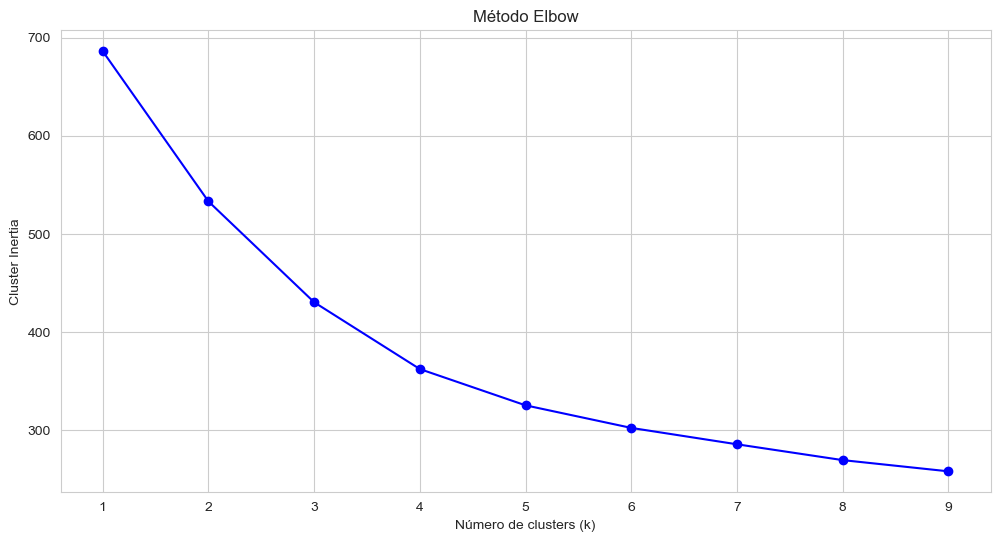

In [208]:
clusters_inertia = []
k_values = []

for k in range(1,10):
        kmeans_model = KMeans(n_clusters = k,       # nº de clusters
                              init = 'k-means++',   # método de inicialização
                              n_init = 10)          # nº de inicializações diferentes
        kmeans_model.fit(X_array)
        
        clusters_inertia.append(kmeans_model.inertia_)
        k_values.append(k)    
    
figure = plt.subplots(figsize = (12, 6))
plt.plot(k_values, clusters_inertia, 'o-', color = 'blue')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Cluster Inertia")
plt.title("Método Elbow")
plt.show()    

In [209]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init = 10)
kmeans.fit(X_array)

# Cluster labels
cluster_labels = kmeans.labels_

# Cluster Centers
cluster_centers = kmeans.cluster_centers_

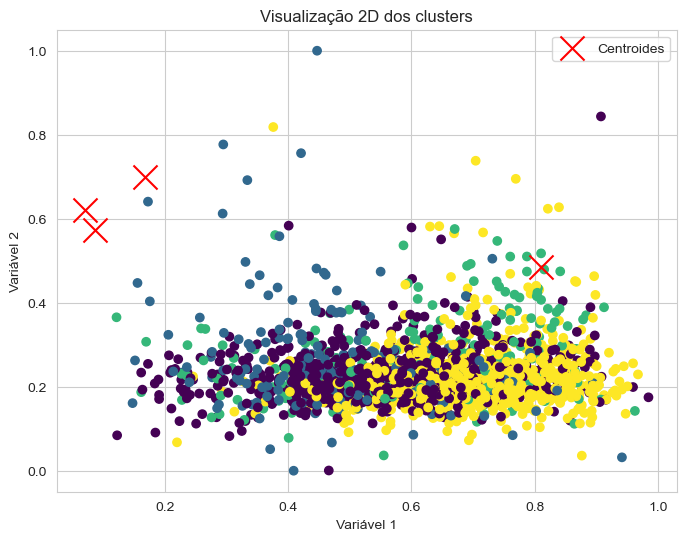

In [210]:
plt.figure(figsize=(8, 6))
plt.scatter(X_array[:, 1], X_array[:,2], c=cluster_labels, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroides')
plt.title("Visualização 2D dos clusters")
plt.xlabel("Variável 1")
plt.ylabel("Variável 2")
plt.legend()
plt.show()

### Dados tratados

#### PCA

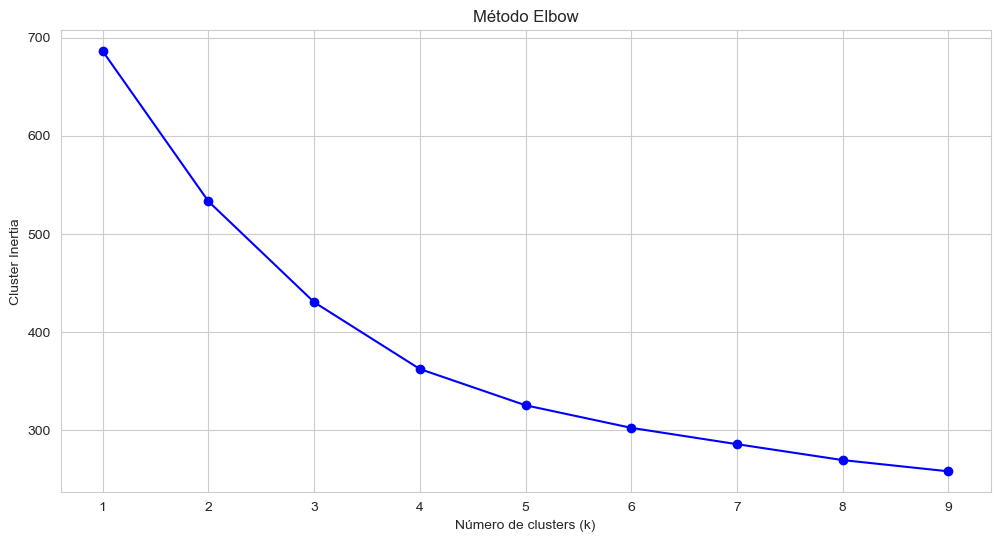

In [211]:
clusters_inertia = []
k_values = []

for k in range(1,10):
        kmeans_model = KMeans(n_clusters = k,       # nº de clusters
                              init = 'k-means++',   # método de inicialização
                              n_init = 10)          # nº de inicializações diferentes
        kmeans_model.fit(X_pca)
        
        clusters_inertia.append(kmeans_model.inertia_)
        k_values.append(k)    
    
figure = plt.subplots(figsize = (12, 6))
plt.plot(k_values, clusters_inertia, 'o-', color = 'blue')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Cluster Inertia")
plt.title("Método Elbow")
plt.show() 

In [212]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init = 10)
kmeans.fit(X_pca)

# Cluster labels
cluster_labels = kmeans.labels_

# Cluster Centers
cluster_centers = kmeans.cluster_centers_

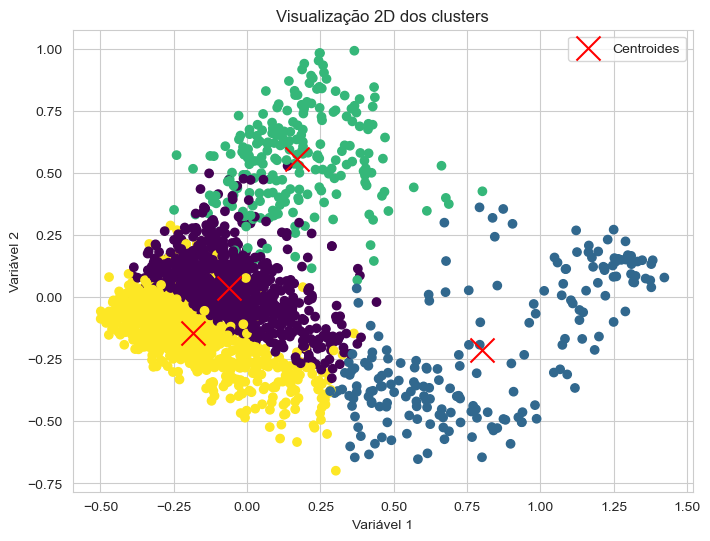

In [374]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:,1], c=cluster_labels, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroides')
plt.title("Visualização 2D dos clusters")
plt.xlabel("Variável 1")
plt.ylabel("Variável 2")
plt.legend()
plt.show()

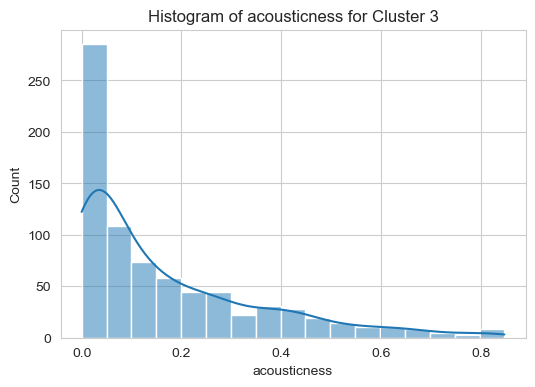

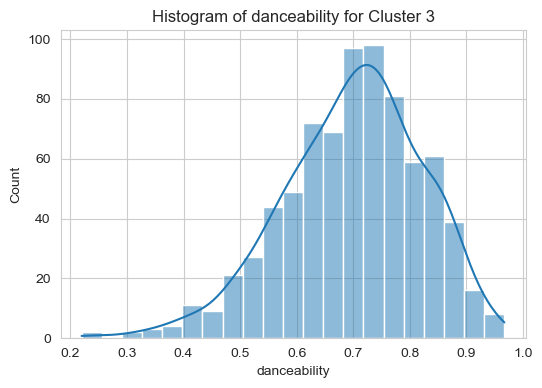

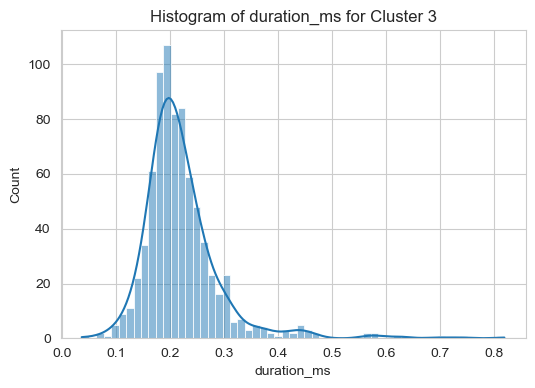

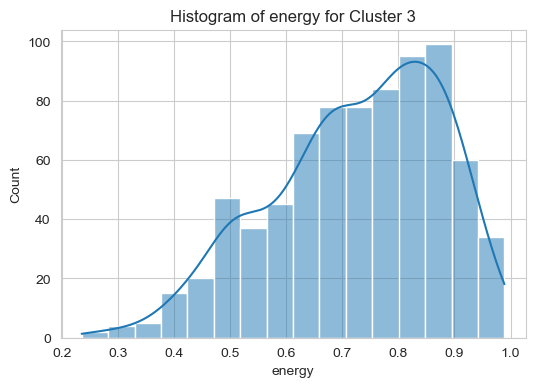

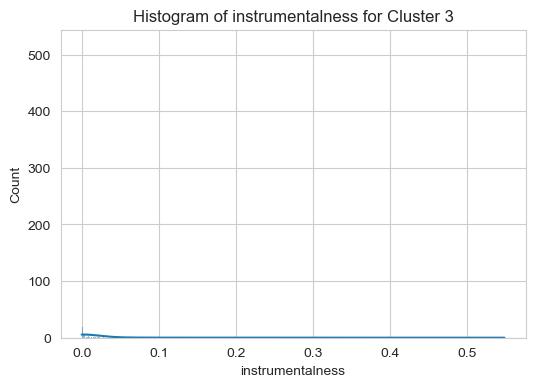

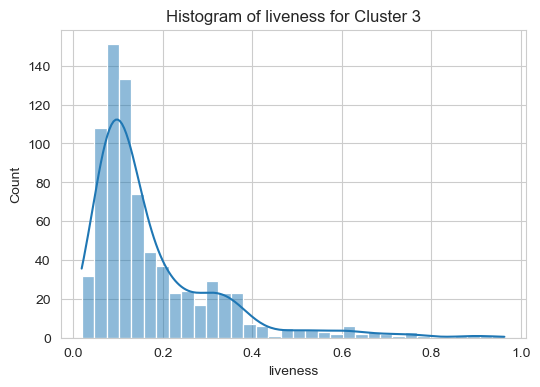

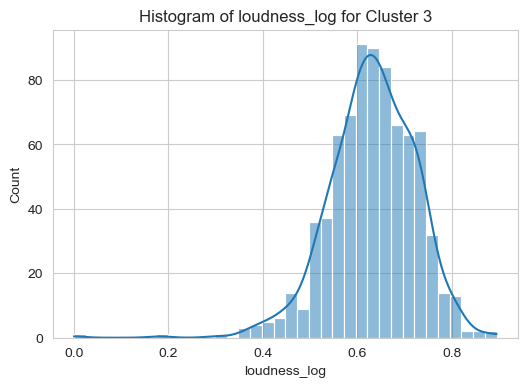

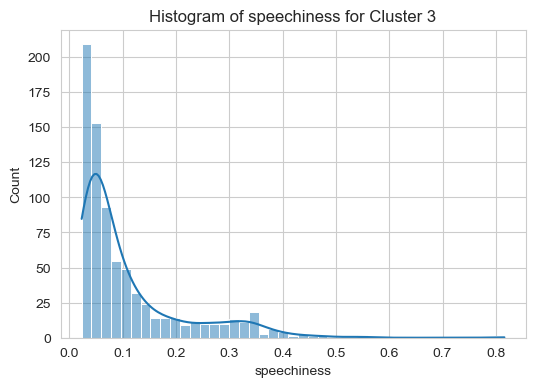

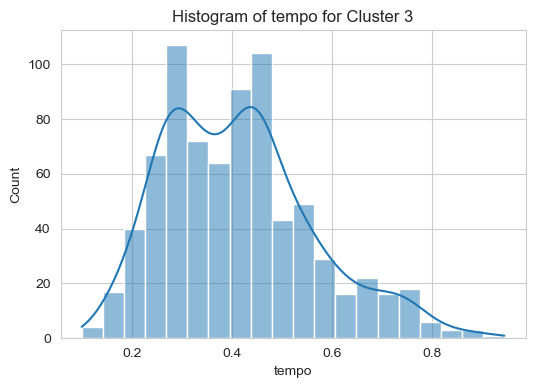

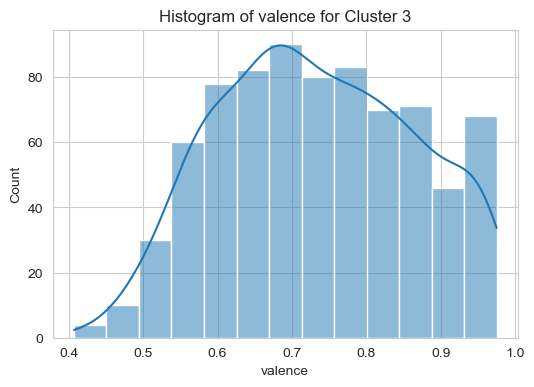

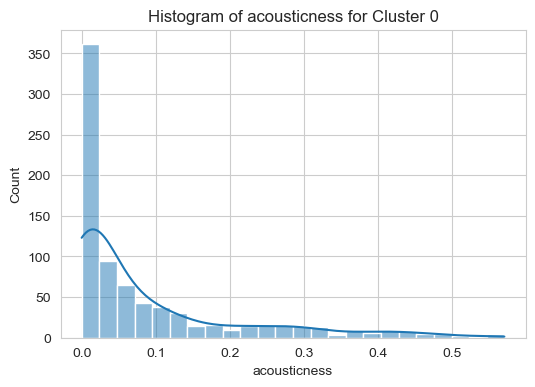

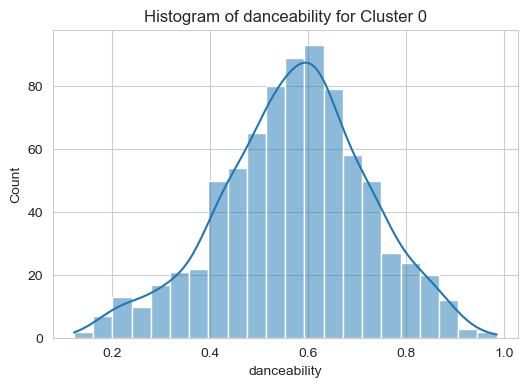

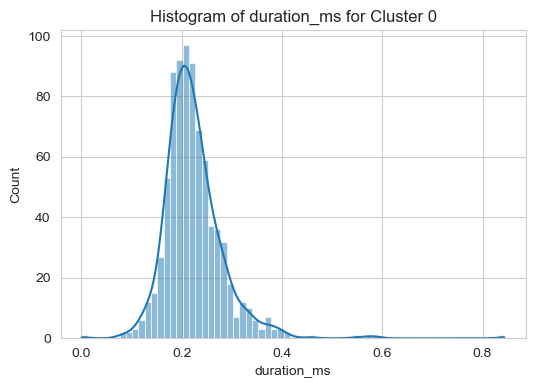

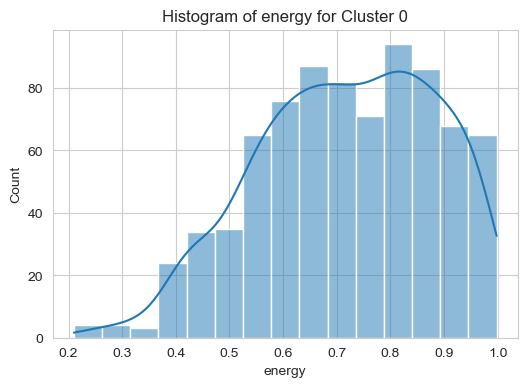

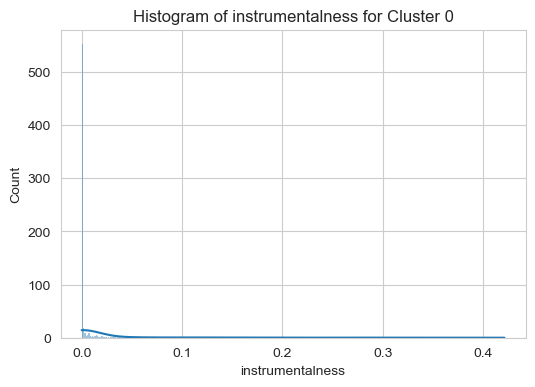

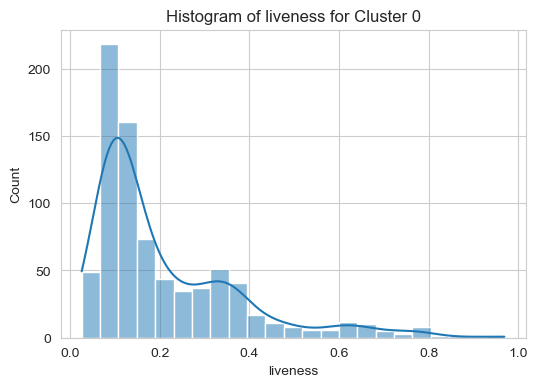

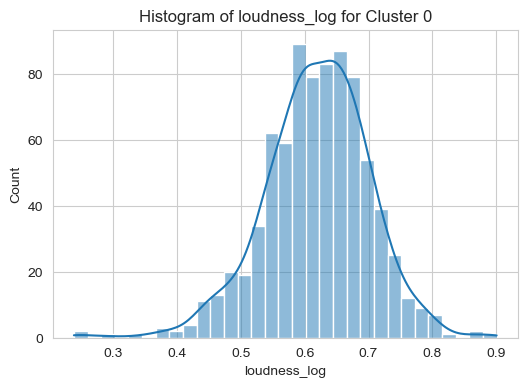

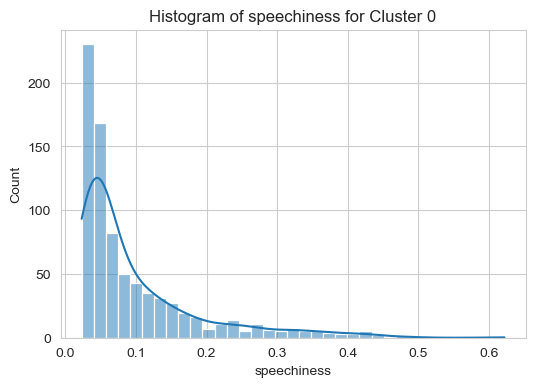

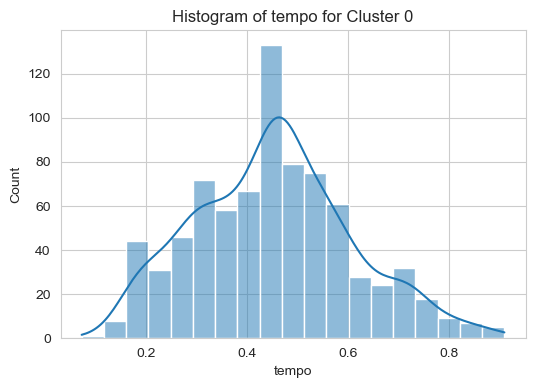

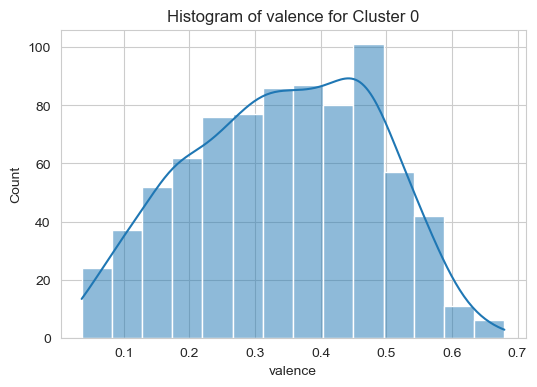

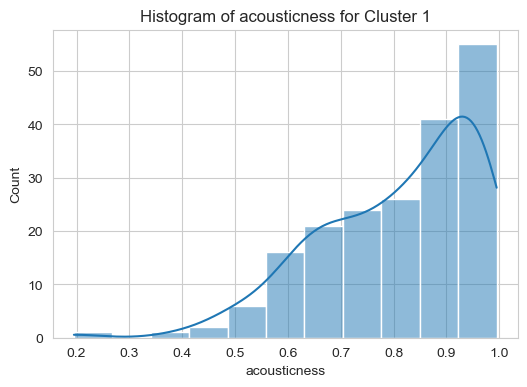

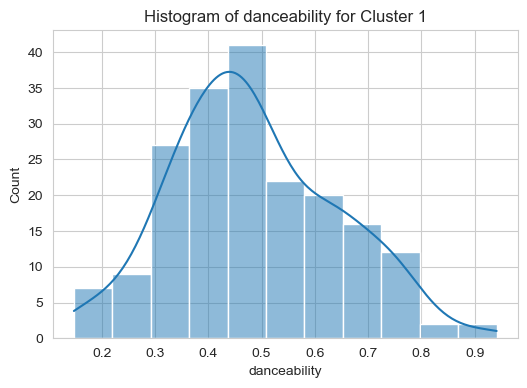

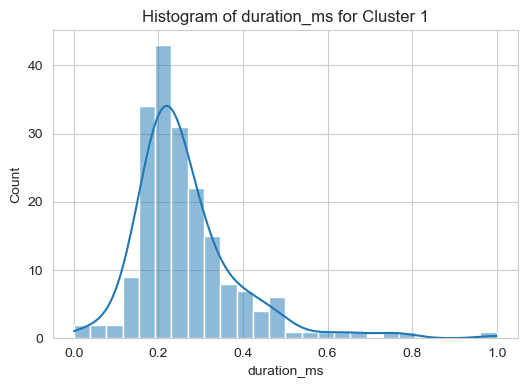

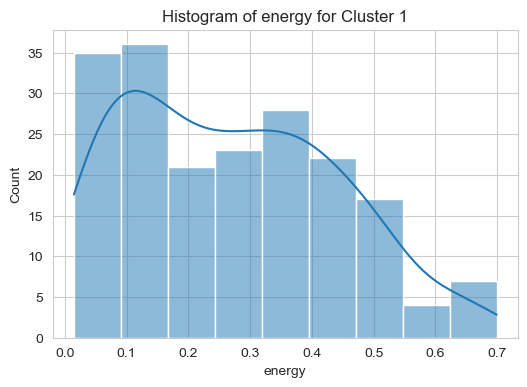

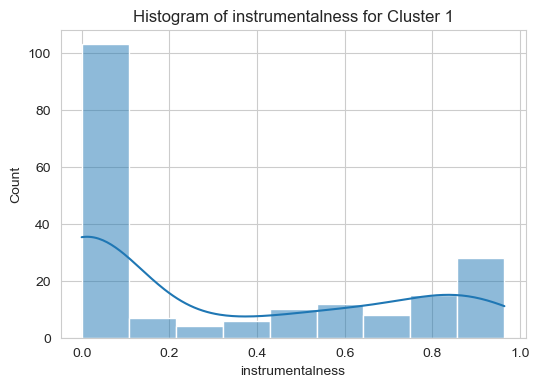

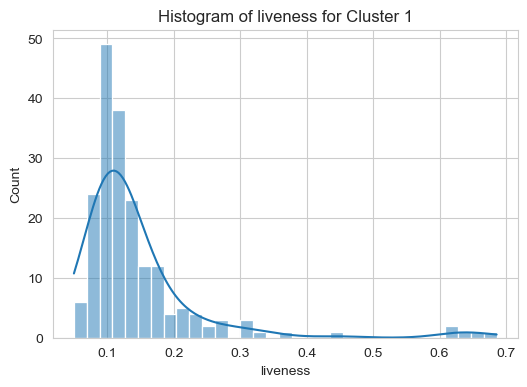

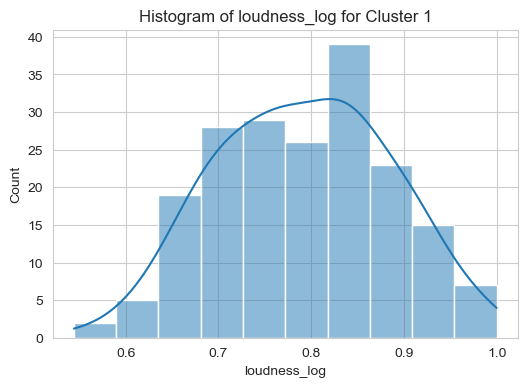

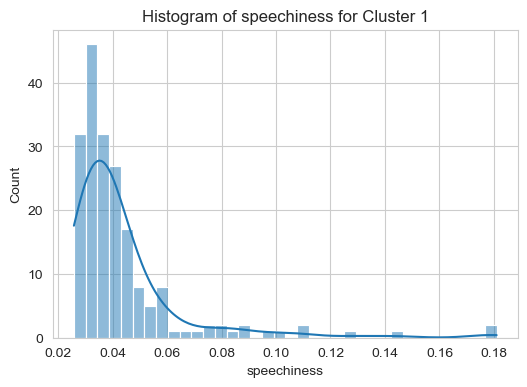

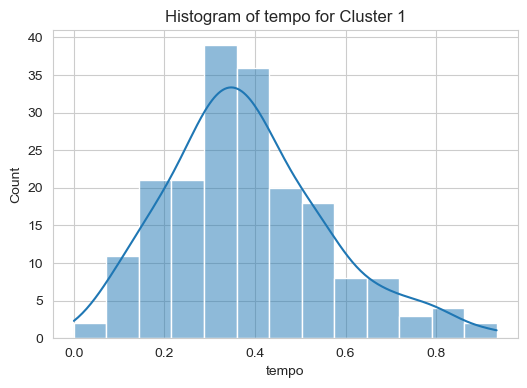

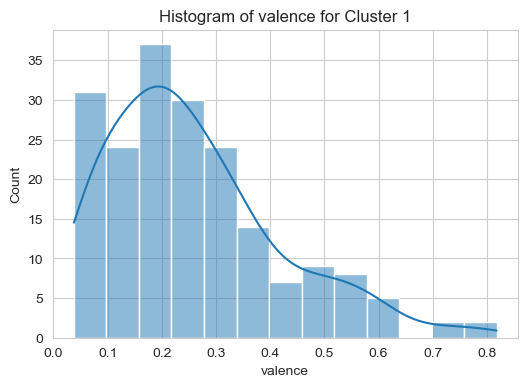

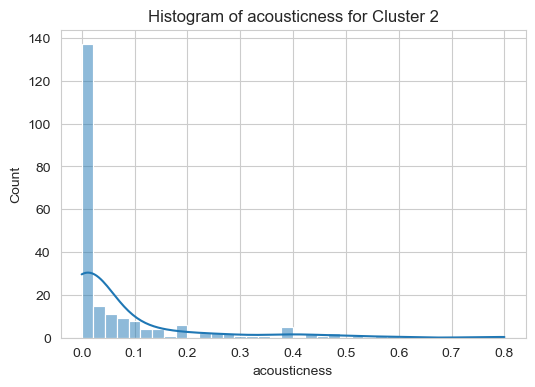

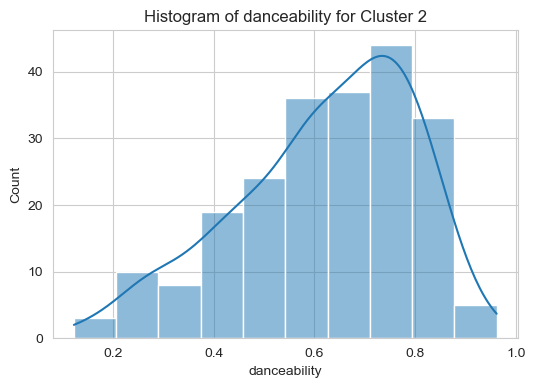

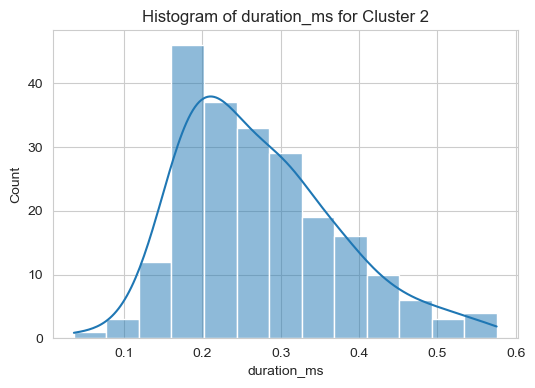

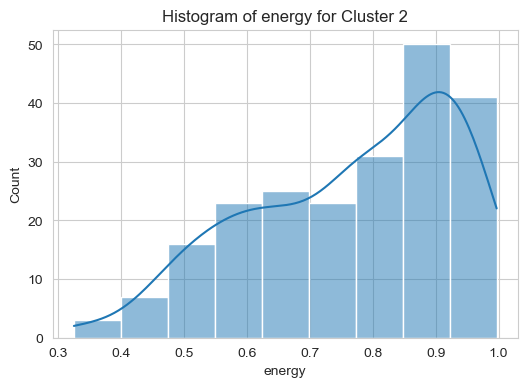

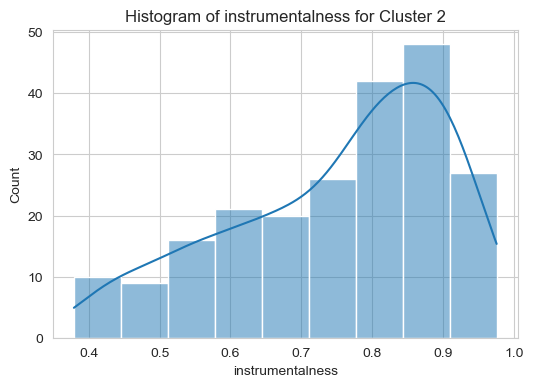

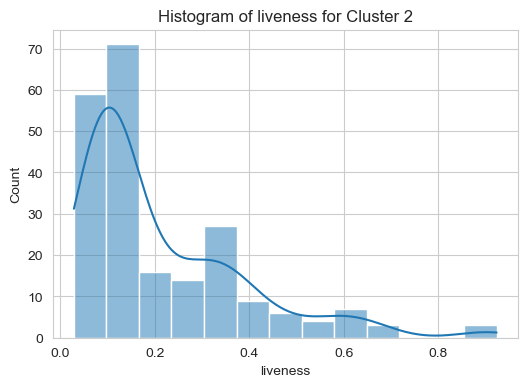

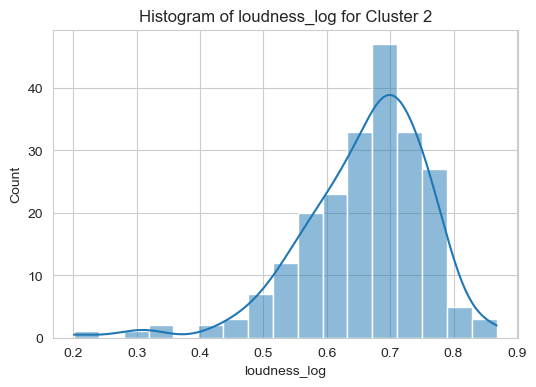

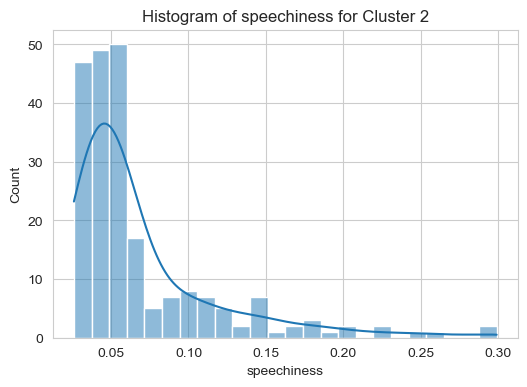

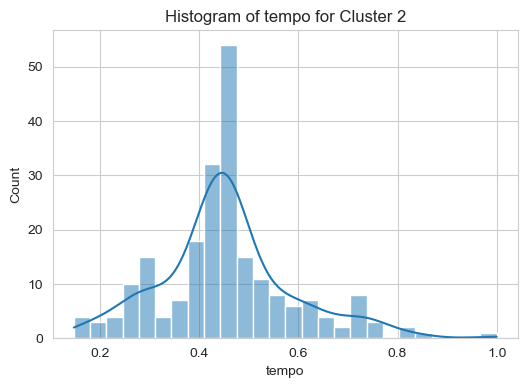

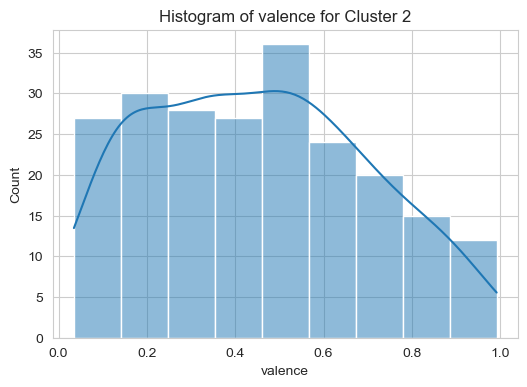

In [214]:
df_norm['Cluster'] = cluster_labels

variables = df_norm.columns[:-1]
for cluster in df_norm['Cluster'].unique():
    cluster_data = df_norm[df_norm['Cluster'] == cluster]
    for variable in variables:
        plt.figure(figsize=(6, 4))
        sns.histplot(cluster_data[variable], kde=True)
        plt.title(f'Histogram of {variable} for Cluster {cluster}')
        plt.show()

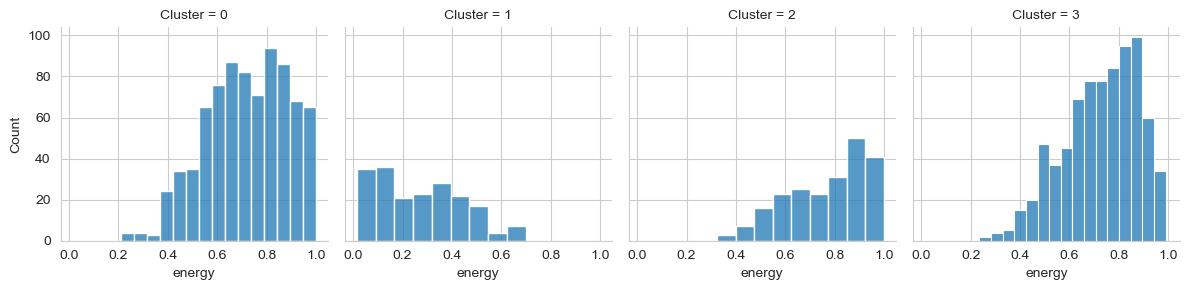

In [220]:
g = sns.FacetGrid(df_norm, col="Cluster")
g.map(sns.histplot, "energy")